### Praveen Joseph

### Part 0: Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# data = pd.read_excel('Master Data HC.xlsx', index_col=False, parse_dates = ['Date'], date_parser=d)

# Note - for now, it is okay to ignore the warning about mixed types.  

%matplotlib inline

### Part 1: Read data
**1. Macroeconomic Data (econ_data)**<br><br>
**2. Global Stocks Data (stock_data)**<br><br>
**3. Commodity price and Index Data (commodity_data)**<br><br>
**4. US Credit and Sentiment (credit_data)**<br><br>

In [3]:
xl = pd.ExcelFile('Master Data Final.xlsx') #use the ExcelFile class to read the file

sheet_name = xl.sheet_names  # see all sheet names

#store the data in 4 data frames
econ_data = xl.parse(sheet_name[0])
stock_data = xl.parse(sheet_name[1])
commodity_data = xl.parse(sheet_name[2])
credit_data = xl.parse(sheet_name[3])

# Take a first look at the data to see if the data was imported correctly
display(econ_data.head())
display(stock_data.head())
display(commodity_data.head())
display(credit_data.head())

Date  Fed Funds Rate  GDP Nominal (%)  GDP Real  Inflation  \
0 2019-06-28            2.38              4.0       2.3        1.6   
1 2019-03-29            2.41              4.6       2.7        1.9   
2 2018-12-31            2.27              4.9       2.5        1.9   
3 2018-09-28            1.95              5.8       3.1        2.3   
4 2018-06-29            1.82              6.0       3.2        2.9   

   Unemployment  FED Consumer Credit Change($Bn)  \
0          3.63                           17.086   
1          3.87                           10.982   
2          3.80                           11.997   
3          3.80                           14.311   
4          3.90                            8.875   

   FED Consumer Credit change(YOY%)  NY FED Recession Index  \
0                               5.2                   12.51   
1                               4.9                   10.84   
2                               4.7                   11.46   
3                               4.9                   10.33   
4                               4.2                    9.87   

   Confernce Board Leading Indicators Index  
0                                       1.6  
1                                       2.9  
2                                       4.1  
3                                       6.6  
4                                       5.8

Date  S&P 500 TR Index  MSCI World Stocks  EURO STOXX 50  \
0 2019-06-28           2941.76            2178.35        3473.69   
1 2019-05-31           2752.06            2046.25        3280.43   
2 2019-04-30           2945.83            2178.67        3514.62   
3 2019-03-29           2834.40            2107.74        3351.71   
4 2019-02-28           2784.49            2085.84        3298.26   

   MSCI APAC Stocks  MSCI EM Index  Nasdaq Index   Bitcoin  \
0            160.05        1054.86      8006.244  12212.70   
1            152.36         998.00      7453.148   8503.38   
2            162.36        1079.24      8095.388   5237.87   
3            159.81        1058.13      7729.321   4072.16   
4            158.69        1050.95      7532.532   3802.53   

   Citigroup Economic Surprise Index  US Dollar Index  
0                              -68.3           96.130  
1                              -32.3           97.750  
2                              -58.7           97.479  
3                              -35.9           97.284  
4                              -29.8           96.157

Date     Gold   Silver  Oil Index  NatGas Index  Agriculture Index  \
0 2019-06-28  1409.55  15.3150    488.916      15.83163           354.7374   
1 2019-05-31  1305.58  14.5942    448.499      16.76547           353.5957   
2 2019-04-30  1283.53  14.9525    535.766      17.79443           322.1981   
3 2019-03-29  1292.38  15.1183    503.268      18.64069           333.5600   
4 2019-02-28  1313.32  15.6120    480.793      19.72403           338.9276   

   Soybean Index  Corn Index  Wheat Index  WTI_Oil  
0       3579.369     74.3491      74.2323    54.66  
1       3504.901     75.9928      71.2631    60.83  
2       3403.133     64.3832      60.6207    63.86  
3       3567.618     64.6971      65.1003    58.15  
4       3665.369     67.1522      65.2221    54.95

Date  S&P/Experian Consumer Credit  Umich Consumer Sentiment  \
0 2019-06-30                           NaN                      98.2   
1 2019-05-31                          0.83                     100.0   
2 2019-04-30                          0.88                      97.2   
3 2019-03-31                          0.92                      98.4   
4 2019-02-28                          0.92                      93.8   

   Umich Consumer Expectation  Citigroup Economic Surprise Index  \
0                        89.3                              -68.3   
1                        93.5                              -32.3   
2                        87.4                              -58.7   
3                        88.8                              -35.9   
4                        84.4                              -29.8   

   FED Consumer Credit Change($Bn)  FED Consumer Credit change(YOY%)  \
0                              NaN                               NaN   
1                           17.086                               5.2   
2                           17.457                               5.3   
3                           10.982                               4.9   
4                           15.500                               4.9   

   NY FED Recession probability Index  \
0                               12.51   
1                               11.12   
2                               11.21   
3                               10.84   
4                                9.14   

   Confernce Board Leading Indicators Index  
0                                       1.6  
1                                       2.5  
2                                       2.5  
3                                       2.9  
4                                       3.0

### Part 2: Rename the colums and organize the data

In [4]:
# 1. We find the column names are long and unwieldly, so we need to modify them

#Update the column names in the data
econ_data.columns = ['Date', 'Fed_Rate', 'GDP_Nominal', 'GDP_Real', 'Inflation',
       'Unemployment', 'Consumer_Credit_USD',
       'Consumer_Credit_YOY', 'FED_Recession_Index', 'CB_Leading_Indic']

stock_data.columns = ['Date', 'S&P_Index', 'MSCI_World', 'EURO_STOXX',
       'MSCI_APAC', 'MSCI_EM', 'Nasdaq_Index', 'Bitcoin',
       'Citi_econ_surprise','USD_Index']

commodity_data.columns = ['Date', 'Gold', 'Silver', 'Oil', 'NatGas',
       'Agriculture', 'Soybean', 'Corn', 'Wheat','WTI_Oil']

credit_data.columns = ['Date', 'Experian_Cons_Credit', 'Umich_Cons_Sent',
       'Umich_Cons_Expect', 'Citi_econ_surprise',
       'Consumer_Credit_USD_2', 'Consumer_Credit_YOY_2',
       'FED_Recession_Index',
       'Leading_Indicators']
display(econ_data.head())
display(stock_data.head())
display(commodity_data.head())
display(credit_data.head())

Date  Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
0 2019-06-28      2.38          4.0       2.3        1.6          3.63   
1 2019-03-29      2.41          4.6       2.7        1.9          3.87   
2 2018-12-31      2.27          4.9       2.5        1.9          3.80   
3 2018-09-28      1.95          5.8       3.1        2.3          3.80   
4 2018-06-29      1.82          6.0       3.2        2.9          3.90   

   Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
0               17.086                  5.2                12.51   
1               10.982                  4.9                10.84   
2               11.997                  4.7                11.46   
3               14.311                  4.9                10.33   
4                8.875                  4.2                 9.87   

   CB_Leading_Indic  
0               1.6  
1               2.9  
2               4.1  
3               6.6  
4               5.8

Date  S&P_Index  MSCI_World  EURO_STOXX  MSCI_APAC  MSCI_EM  \
0 2019-06-28    2941.76     2178.35     3473.69     160.05  1054.86   
1 2019-05-31    2752.06     2046.25     3280.43     152.36   998.00   
2 2019-04-30    2945.83     2178.67     3514.62     162.36  1079.24   
3 2019-03-29    2834.40     2107.74     3351.71     159.81  1058.13   
4 2019-02-28    2784.49     2085.84     3298.26     158.69  1050.95   

   Nasdaq_Index   Bitcoin  Citi_econ_surprise  USD_Index  
0      8006.244  12212.70               -68.3     96.130  
1      7453.148   8503.38               -32.3     97.750  
2      8095.388   5237.87               -58.7     97.479  
3      7729.321   4072.16               -35.9     97.284  
4      7532.532   3802.53               -29.8     96.157

Date     Gold   Silver      Oil    NatGas  Agriculture   Soybean  \
0 2019-06-28  1409.55  15.3150  488.916  15.83163     354.7374  3579.369   
1 2019-05-31  1305.58  14.5942  448.499  16.76547     353.5957  3504.901   
2 2019-04-30  1283.53  14.9525  535.766  17.79443     322.1981  3403.133   
3 2019-03-29  1292.38  15.1183  503.268  18.64069     333.5600  3567.618   
4 2019-02-28  1313.32  15.6120  480.793  19.72403     338.9276  3665.369   

      Corn    Wheat  WTI_Oil  
0  74.3491  74.2323    54.66  
1  75.9928  71.2631    60.83  
2  64.3832  60.6207    63.86  
3  64.6971  65.1003    58.15  
4  67.1522  65.2221    54.95

Date  Experian_Cons_Credit  Umich_Cons_Sent  Umich_Cons_Expect  \
0 2019-06-30                   NaN             98.2               89.3   
1 2019-05-31                  0.83            100.0               93.5   
2 2019-04-30                  0.88             97.2               87.4   
3 2019-03-31                  0.92             98.4               88.8   
4 2019-02-28                  0.92             93.8               84.4   

   Citi_econ_surprise  Consumer_Credit_USD_2  Consumer_Credit_YOY_2  \
0               -68.3                    NaN                    NaN   
1               -32.3                 17.086                    5.2   
2               -58.7                 17.457                    5.3   
3               -35.9                 10.982                    4.9   
4               -29.8                 15.500                    4.9   

   FED_Recession_Index  Leading_Indicators  
0                12.51                 1.6  
1                11.12                 2.5  
2                11.21                 2.5  
3                10.84                 2.9  
4                 9.14                 3.0

### Part 3: Creating bins for the date variable odering them all to the first day of the month to merge the data

In [5]:
# Editing the date column for econ data (Note: Econ data is released quarterly, the rest are monthly timeseries)
from datetime import datetime
econ_data['year'] = econ_data.Date.dt.year
econ_data['month'] = econ_data.Date.dt.month
econ_data['date'] = econ_data.apply(lambda row: datetime(row.year, row.month, 1), axis=1)
econ_data['Date'] = econ_data['date']
econ_data.drop(["year","month","date"], axis =1, inplace=True)
econ_data.tail()
# econ_data.dtypes

Date  Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
193 1971-03-01      3.71          8.0       2.7        4.7          5.93   
194 1970-12-01      4.90          4.9      -0.2        5.6           NaN   
195 1970-09-01      6.29          5.4       0.4        5.7           NaN   
196 1970-06-01      7.60          5.8       0.2        6.0           NaN   
197 1970-03-01      7.76          5.8       0.3        5.8           NaN   

     Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
193                  NaN                  5.8                  NaN   
194                  NaN                  3.5                  NaN   
195                  NaN                  4.4                  NaN   
196                  NaN                  4.7                  NaN   
197                  NaN                  6.5                  NaN   

     CB_Leading_Indic  
193               2.9  
194              -1.8  
195              -4.6  
196              -5.6  
197              -5.2

**Stock data**

In [6]:
# Editing the date column for stock data (monthly timeseries)

from datetime import datetime
stock_data['year'] = stock_data.Date.dt.year.fillna("1900").astype("int")
stock_data['month'] = stock_data.Date.dt.month.fillna("1").astype("int")
stock_data['date'] = stock_data.apply(lambda row: datetime(row.year, row.month, 1), axis=1)
stock_data['Date'] = stock_data['date']
stock_data.drop(["year","month","date"], axis =1, inplace=True)

stock_data.drop(stock_data.index[198:199], inplace = True)
stock_data.head()

Date  S&P_Index  MSCI_World  EURO_STOXX  MSCI_APAC  MSCI_EM  \
0 2019-06-01    2941.76     2178.35     3473.69     160.05  1054.86   
1 2019-05-01    2752.06     2046.25     3280.43     152.36   998.00   
2 2019-04-01    2945.83     2178.67     3514.62     162.36  1079.24   
3 2019-03-01    2834.40     2107.74     3351.71     159.81  1058.13   
4 2019-02-01    2784.49     2085.84     3298.26     158.69  1050.95   

   Nasdaq_Index   Bitcoin  Citi_econ_surprise  USD_Index  
0      8006.244  12212.70               -68.3     96.130  
1      7453.148   8503.38               -32.3     97.750  
2      8095.388   5237.87               -58.7     97.479  
3      7729.321   4072.16               -35.9     97.284  
4      7532.532   3802.53               -29.8     96.157

**Credit data**

In [7]:
# Editing the date column for credit data 

from datetime import datetime
credit_data['year'] = credit_data.Date.dt.year.fillna("1900").astype("int")
credit_data['month'] = credit_data.Date.dt.month.fillna("1").astype("int")
credit_data['date'] = credit_data.apply(lambda row: datetime(row.year, row.month, 1), axis=1)
credit_data['Date'] = credit_data['date']
credit_data.drop(["year","month","date"], axis =1, inplace=True)

# credit_data.drop(credit_data.index[198:199], inplace = True)
credit_data.tail()

Date  Experian_Cons_Credit  Umich_Cons_Sent  Umich_Cons_Expect  \
588 1970-05-01                   0.0              0.0                0.0   
589 1970-04-01                   0.0              0.0                0.0   
590 1970-03-01                   0.0              0.0                0.0   
591 1970-02-01                   0.0              0.0                0.0   
592 1970-01-01                   0.0              0.0                0.0   

     Citi_econ_surprise  Consumer_Credit_USD_2  Consumer_Credit_YOY_2  \
588                 0.0                    NaN                    4.7   
589                 0.0                    NaN                    4.9   
590                 0.0                    NaN                    5.6   
591                 0.0                    NaN                    6.5   
592                 0.0                    NaN                    7.3   

     FED_Recession_Index  Leading_Indicators  
588                31.19                -5.6  
589                27.51                -6.2  
590                32.42                -6.7  
591                27.49                -5.2  
592                32.20                -4.4

**Commodity data**

In [8]:
from datetime import datetime
commodity_data['year'] = commodity_data.Date.dt.year.fillna("1900").astype("int")
commodity_data['month'] = commodity_data.Date.dt.month.fillna("1").astype("int")
commodity_data['date'] = commodity_data.apply(lambda row: datetime(row.year, row.month, 1), axis=1)
commodity_data['Date'] = commodity_data['date']
commodity_data.drop(["year","month","date"], axis =1, inplace=True)

# commodity_data.drop(commodity_data.index[198:199], inplace = True)
commodity_data.tail()

Date   Gold  Silver  Oil  NatGas  Agriculture  Soybean      Corn  \
589 1970-05-01  35.95   1.631  0.0     0.0     104.8636  107.263  108.0883   
590 1970-04-01  35.62   1.724  0.0     0.0     107.2068  105.743  107.3949   
591 1970-03-01  35.09   1.878  0.0     0.0     102.1295  103.180  102.2223   
592 1970-02-01  34.99   1.899  0.0     0.0     102.8170  103.249  101.8114   
593 1970-01-01  34.94   1.912  0.0     0.0      99.1626  101.545  100.0234   

        Wheat  WTI_Oil  
589  102.2507     3.35  
590  107.5514     3.35  
591  101.9164     3.35  
592  103.4071     3.35  
593   98.1714     3.35

**Test code for merging dataframes**

In [9]:
test_data = econ_data.merge(credit_data, how = 'inner', on = ['Date'])
test_data.set_index("Date")
test_data.head()

Date  Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
0 2019-06-01      2.38          4.0       2.3        1.6          3.63   
1 2019-03-01      2.41          4.6       2.7        1.9          3.87   
2 2018-12-01      2.27          4.9       2.5        1.9          3.80   
3 2018-09-01      1.95          5.8       3.1        2.3          3.80   
4 2018-06-01      1.82          6.0       3.2        2.9          3.90   

   Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index_x  \
0               17.086                  5.2                  12.51   
1               10.982                  4.9                  10.84   
2               11.997                  4.7                  11.46   
3               14.311                  4.9                  10.33   
4                8.875                  4.2                   9.87   

   CB_Leading_Indic  Experian_Cons_Credit  Umich_Cons_Sent  Umich_Cons_Expect  \
0               1.6                   NaN             98.2               89.3   
1               2.9                  0.92             98.4               88.8   
2               4.1                  0.89             98.3               87.0   
3               6.6                  0.82            100.1               90.5   
4               5.8                  0.86             98.2               86.3   

   Citi_econ_surprise  Consumer_Credit_USD_2  Consumer_Credit_YOY_2  \
0               -68.3                    NaN                    NaN   
1               -35.9                 10.982                    4.9   
2               -23.8                 11.997                    4.7   
3                -5.2                 14.311                    4.9   
4                -4.9                  8.875                    4.2   

   FED_Recession_Index_y  Leading_Indicators  
0                  12.51                 1.6  
1                  10.84                 2.9  
2                  11.46                 4.1  
3                  10.33                 6.6  
4                   9.87                 5.8

### Part 4: Setting date as the index and vizualizing the data to understand economic trends

In [10]:
econ_data.set_index("Date", inplace = True)
stock_data.set_index("Date", inplace = True)
commodity_data.set_index("Date", inplace = True)
credit_data.set_index("Date", inplace = True)

### Part 0: We startout by regressing the 3 major macrovariable

1. Gross Domestic Product (GDP) is the most important concept of macroeconomics, it refers to the total amount of goods and services a country produces, commonly known as the GDP. This figure is like a snapshot of the economy at a certain point in time.<br><br>
2. The Unemployment Rate tells us about the health of the labor force and individuals’ ability to find work. When the economy witnesses high growth, unemployment levels tend to be low. This is because with rising (real) GDP levels, output is higher and, hence, more laborers are needed to keep up with the greater levels of production.<br><br>
3. Inflation is the third main factor macroeconomists look at which represents the rate at which prices rise. If nominal GDP is higher than real GDP, we can assume the prices of goods and services has been rising. The data shows the strong correlation between nominal GDP and Inflation with a strong positive relationship.<br><br>

/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


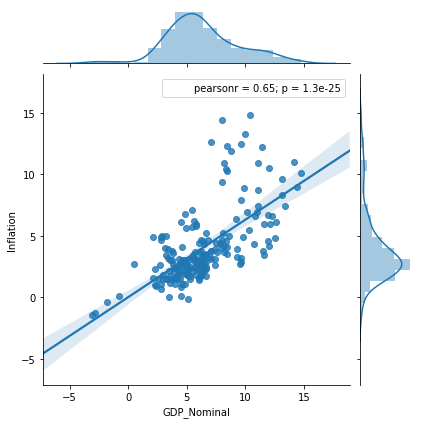

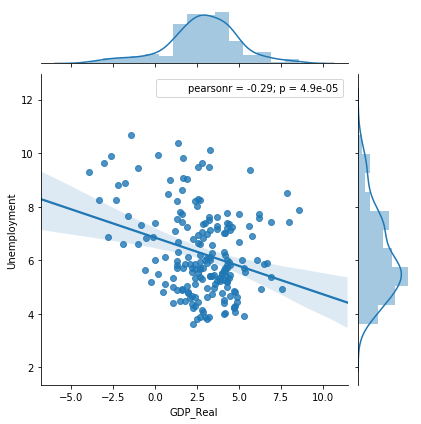

In [11]:
sns.jointplot("GDP_Nominal", "Inflation", data=econ_data, kind='reg')
sns.jointplot("GDP_Real", "Unemployment", data=econ_data, kind='reg')

pass

/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


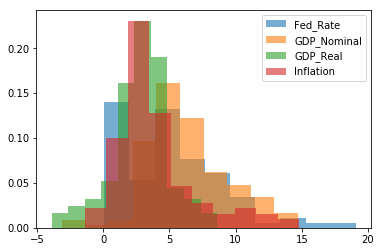

In [12]:
# Here we vizualize the distribution of the 4 core macroeconmic varaible discussed in the presentation

for col in econ_data.columns[0:4]:
    plt.hist(econ_data[col], normed=True, alpha=0.6)
    
plt.legend(econ_data.columns[0:4])
pass


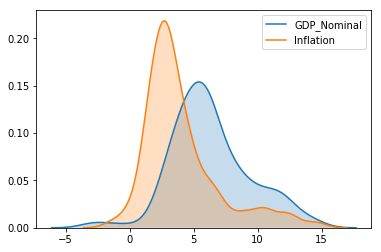

In [13]:
#We find that GDP Nominal and Inflation are closely linked so we explore their distribution further

plot_columns = ["GDP_Nominal", "Inflation"]
for col in plot_columns:
    sns.kdeplot(econ_data[col], shade=True)

### Lattice plot of all 3 macro variable compared together

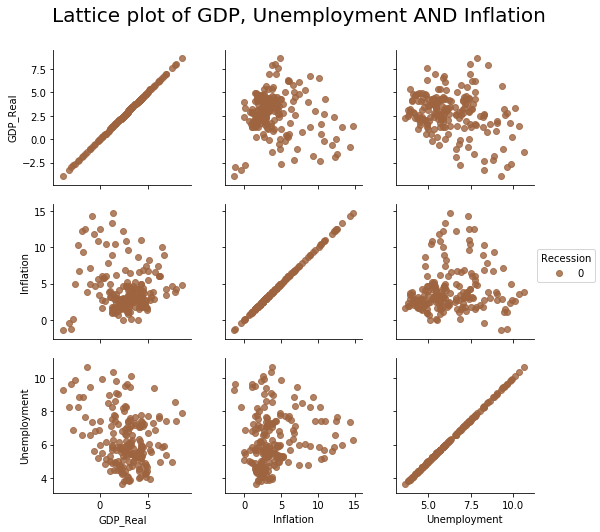

In [14]:
def Recession(df):
    GDP = df.GDP_Real
    for val in GDP:
        if val < 0:
            df ["Recession"] = 1
        else:
            df ["Recession"] = 0
    return df
plot_data = Recession(econ_data)
plot_data.head()
g = sns.PairGrid(plot_data, vars=['GDP_Real', 'Inflation', 'Unemployment'],
                hue='Recession', palette='copper')
g.map(plt.scatter, alpha=0.8)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Lattice plot of GDP, Unemployment AND Inflation', fontsize = 20)
pass

### Create a regime model for recessionary periods

In [15]:
plot_data.groupby("GDP_Real").mean()

ranges = [-10,-1.5,0,2,10]
labels = ["Severe Recession", "Mild Recession","Low Growth", "Economic Boom" ]

# date_ranges = [1980,1982,]

# recession_data = econ_data[econ_data.GDP_Real <= 0]
# recession_data

econ_data["Recession"] = pd.cut(econ_data.GDP_Real,ranges, labels = labels).astype("category")
econ_data.Recession.value_counts()
econ_data["2009":"2007"].head()

Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
Date                                                                   
2009-12-01      0.12          0.5       0.2        2.7          9.93   
2009-09-01      0.15         -2.8      -3.0       -1.3          9.63   
2009-06-01      0.21         -3.1      -3.9       -1.4          9.30   
2009-03-01      0.18         -1.8      -3.3       -0.4          8.27   
2008-12-01      0.16         -0.8      -2.8        0.1          6.87   

            Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
Date                                                                        
2009-12-01                3.447                 -3.4                 2.04   
2009-09-01               -5.532                 -3.0                 1.61   
2009-06-01              -18.535                 -2.7                 2.69   
2009-03-01              -15.705                 -0.9                 2.60   
2008-12-01               -7.692                  1.3                11.73   

            CB_Leading_Indic         Recession  
Date                                            
2009-12-01               1.3        Low Growth  
2009-09-01             -10.0  Severe Recession  
2009-06-01             -17.3  Severe Recession  
2009-03-01             -20.1  Severe Recession  
2008-12-01             -18.8  Severe Recession

### Using grouby and transformation to obtain descriptive summary statistics

In [16]:
transformations = [np.mean, np.std]
agg_dict = {"Recession":transformations}
econ_data.groupby("Recession").agg(np.mean).T

Recession            Severe Recession  Mild Recession  Low Growth  \
Fed_Rate                       5.6180        8.992727    3.933902   
GDP_Nominal                    3.1400        5.409091    4.551220   
GDP_Real                      -2.5400       -0.527273    1.282927   
Inflation                      5.3400        7.645455    4.100000   
Unemployment                   8.4210        7.196000    6.584211   
Consumer_Credit_USD          -11.8660       -1.624750   10.476742   
Consumer_Credit_YOY            1.4000        3.736364    5.287805   
FED_Recession_Index            4.6575       17.322500   13.137742   
CB_Leading_Indic             -11.6200       -6.827273   -1.224390   

Recession            Economic Boom  
Fed_Rate                  5.222279  
GDP_Nominal               7.202941  
GDP_Real                  3.874265  
Inflation                 3.603676  
Unemployment              5.933750  
Consumer_Credit_USD       9.743126  
Consumer_Credit_YOY       8.766176  
FED_Recession_Index       7.363297  
CB_Leading_Indic          4.430882

### Plotting Heatmaps and other graphs using seaborn

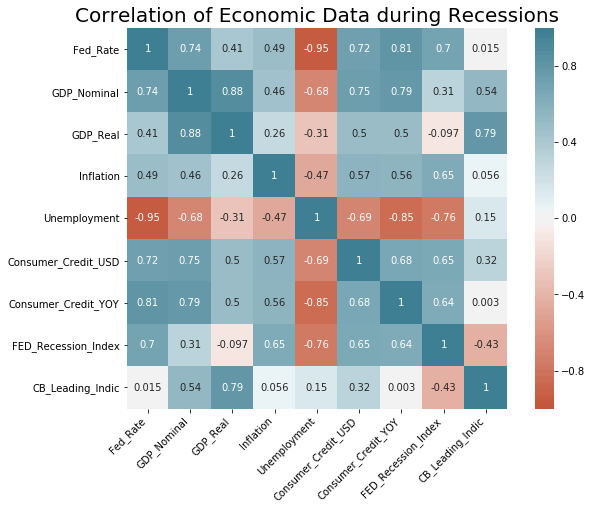

In [17]:
GFC_Corr= econ_data ["2010":"2006"].corr(method ='spearman')

plt.figure(figsize=(10,7))

ax = sns.heatmap(
    GFC_Corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Correlation of Economic Data during Recessions', fontsize = 20);

### Sameed Musvee

### Merge Econ data with Credit data

In [18]:
econ_credit_data = econ_data.merge(credit_data, how = 'inner', on = ['Date'])
econ_credit_data.head()

Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
Date                                                                   
2019-06-01      2.38          4.0       2.3        1.6          3.63   
2019-03-01      2.41          4.6       2.7        1.9          3.87   
2018-12-01      2.27          4.9       2.5        1.9          3.80   
2018-09-01      1.95          5.8       3.1        2.3          3.80   
2018-06-01      1.82          6.0       3.2        2.9          3.90   

            Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index_x  \
Date                                                                          
2019-06-01               17.086                  5.2                  12.51   
2019-03-01               10.982                  4.9                  10.84   
2018-12-01               11.997                  4.7                  11.46   
2018-09-01               14.311                  4.9                  10.33   
2018-06-01                8.875                  4.2                   9.87   

            CB_Leading_Indic      Recession  Experian_Cons_Credit  \
Date                                                                
2019-06-01               1.6  Economic Boom                   NaN   
2019-03-01               2.9  Economic Boom                  0.92   
2018-12-01               4.1  Economic Boom                  0.89   
2018-09-01               6.6  Economic Boom                  0.82   
2018-06-01               5.8  Economic Boom                  0.86   

            Umich_Cons_Sent  Umich_Cons_Expect  Citi_econ_surprise  \
Date                                                                 
2019-06-01             98.2               89.3               -68.3   
2019-03-01             98.4               88.8               -35.9   
2018-12-01             98.3               87.0               -23.8   
2018-09-01            100.1               90.5                -5.2   
2018-06-01             98.2               86.3                -4.9   

            Consumer_Credit_USD_2  Consumer_Credit_YOY_2  \
Date                                                       
2019-06-01                    NaN                    NaN   
2019-03-01                 10.982                    4.9   
2018-12-01                 11.997                    4.7   
2018-09-01                 14.311                    4.9   
2018-06-01                  8.875                    4.2   

            FED_Recession_Index_y  Leading_Indicators  
Date                                                   
2019-06-01                  12.51                 1.6  
2019-03-01                  10.84                 2.9  
2018-12-01                  11.46                 4.1  
2018-09-01                  10.33                 6.6  
2018-06-01                   9.87                 5.8

### Credit data

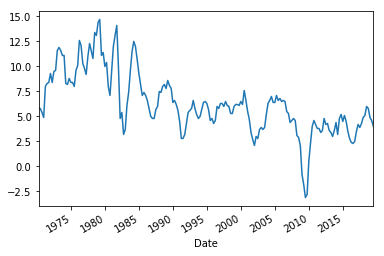

In [19]:
econ_credit_data.GDP_Nominal.plot()
pass

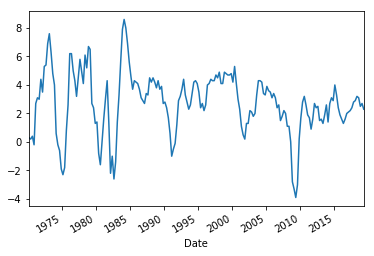

In [20]:
econ_credit_data.GDP_Real.plot()
pass

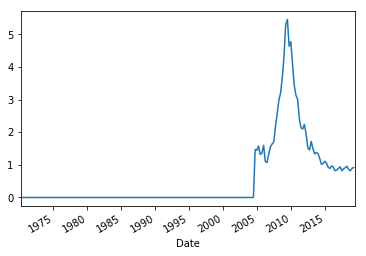

In [21]:
econ_credit_data.Experian_Cons_Credit.plot()
pass

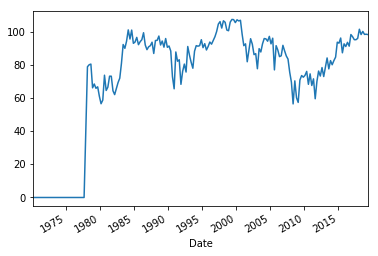

In [22]:
econ_credit_data.Umich_Cons_Sent.plot()
pass

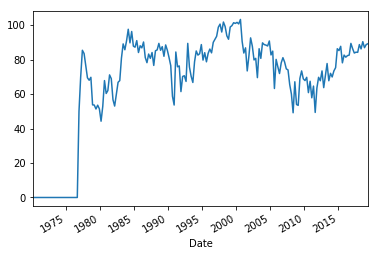

In [23]:
econ_credit_data.Umich_Cons_Expect.plot()
# credit_dataxaxis_range=[datetime.datetime(2018, 10, 17), datetime.datetime(2018, 11, 20)]
pass

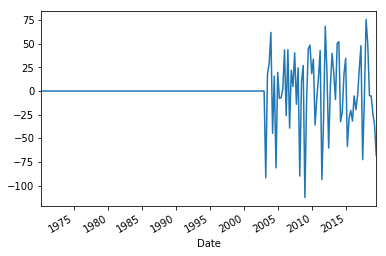

In [24]:
econ_credit_data.Citi_econ_surprise.plot()
pass

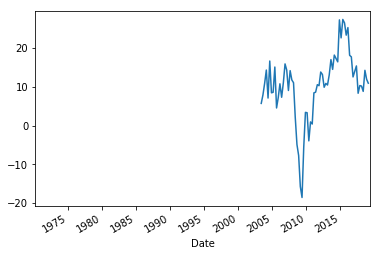

In [25]:
econ_credit_data.Consumer_Credit_USD_2.plot()
pass

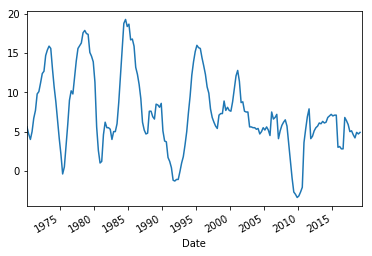

In [26]:
econ_credit_data.Consumer_Credit_YOY_2.plot()
pass

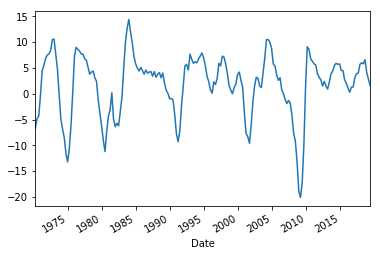

In [27]:
econ_credit_data.Leading_Indicators.plot()
pass

### Create a new column to define a period of recession vs no recession ( apply groupby on the data)

In [28]:
def Recession(df):
    """Funnction to assign a recession marker to the data"""
    GDP = df.GDP_Real
    for val in GDP:
        if val < 0:
            df ["Recession"] = 1
        else:
            df ["Recession"] = 0
    return df

plot_data = Recession(econ_data)
plot_data.head()

Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
Date                                                                   
2019-06-01      2.38          4.0       2.3        1.6          3.63   
2019-03-01      2.41          4.6       2.7        1.9          3.87   
2018-12-01      2.27          4.9       2.5        1.9          3.80   
2018-09-01      1.95          5.8       3.1        2.3          3.80   
2018-06-01      1.82          6.0       3.2        2.9          3.90   

            Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
Date                                                                        
2019-06-01               17.086                  5.2                12.51   
2019-03-01               10.982                  4.9                10.84   
2018-12-01               11.997                  4.7                11.46   
2018-09-01               14.311                  4.9                10.33   
2018-06-01                8.875                  4.2                 9.87   

            CB_Leading_Indic  Recession  
Date                                     
2019-06-01               1.6          0  
2019-03-01               2.9          0  
2018-12-01               4.1          0  
2018-09-01               6.6          0  
2018-06-01               5.8          0

/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


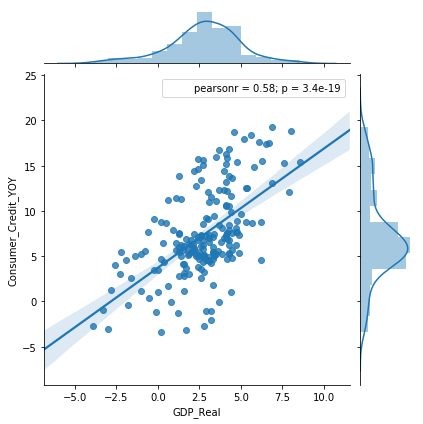

In [29]:
sns.jointplot("GDP_Real", "Consumer_Credit_YOY", data=econ_credit_data, kind='reg')
pass

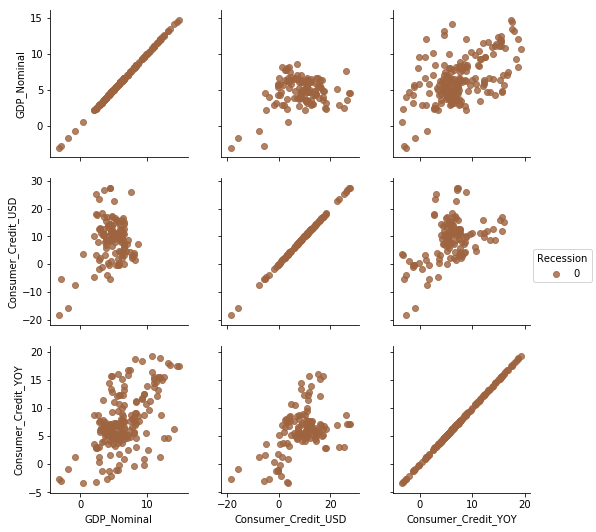

In [30]:
def Recession(df):
    GDP = df.GDP_Real
    for val in GDP:
        if val < 0:
            df ["Recession"] = 1
        else:
            df ["Recession"] = 0
    return df

plot_data = Recession(econ_data)
plot_data.head()

g = sns.PairGrid(plot_data, vars=['GDP_Nominal', 'Consumer_Credit_USD', 'Consumer_Credit_YOY'],
                 hue='Recession', palette='copper')
g.map(plt.scatter, alpha=0.8)
g.add_legend()
pass

### Plotting Heatmaps and other graphs using seaborn

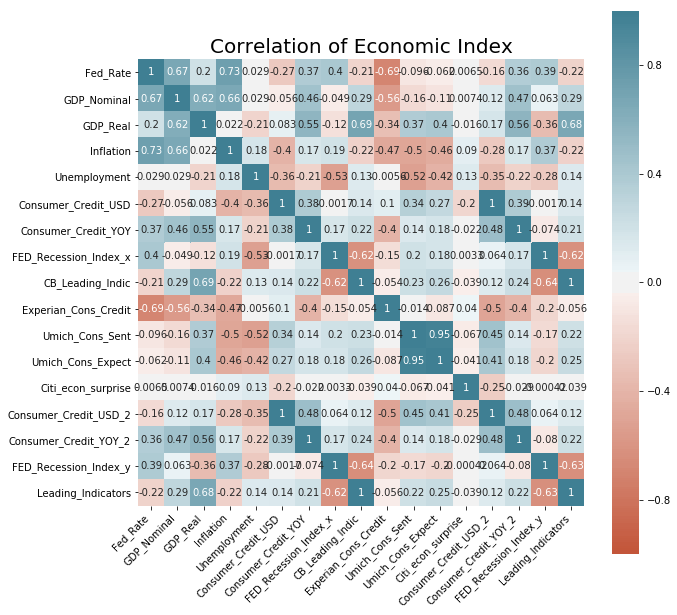

In [31]:
corr = econ_credit_data.corr(method ='spearman')

plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Correlation of Economic Index', fontsize = 20);

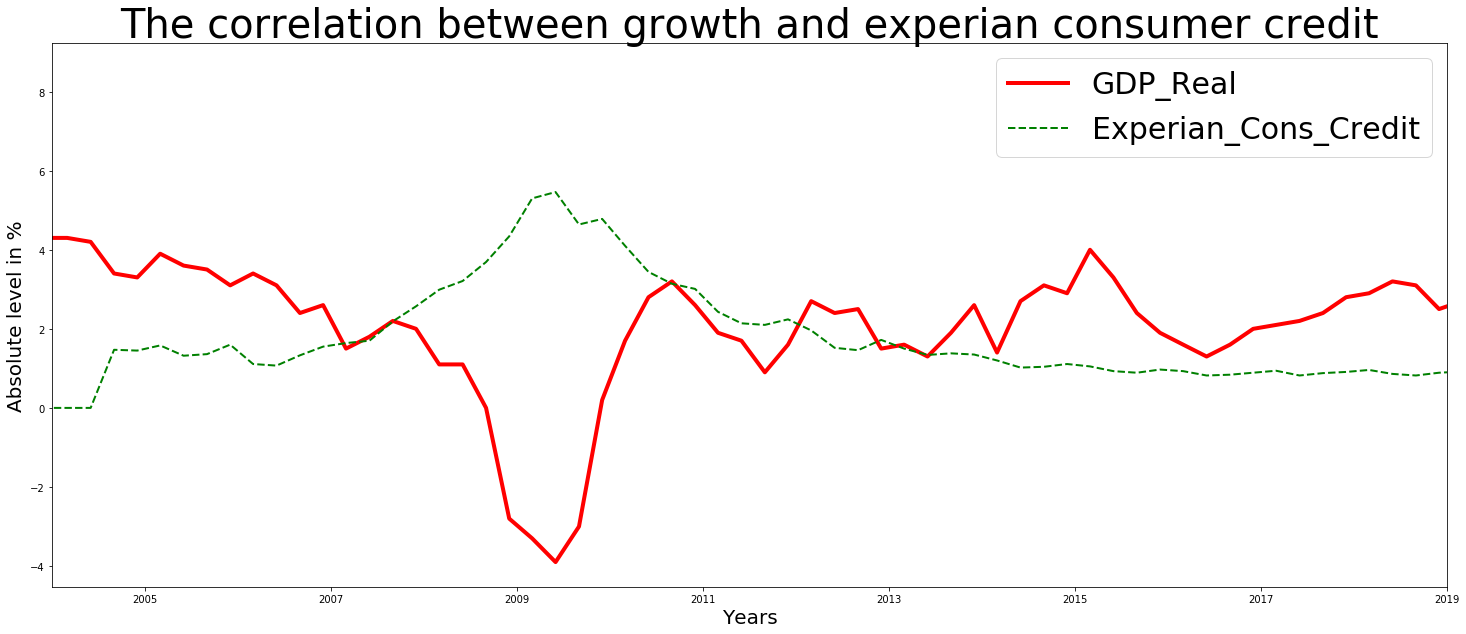

In [32]:
fig, ax = plt.subplots(figsize = (25,10))

plt.plot('GDP_Real', data=econ_credit_data, marker='', markerfacecolor='', markersize=12, color='red', linewidth=4)
plt.plot('Experian_Cons_Credit', data=econ_credit_data, marker='', color='green', linewidth=2, linestyle='dashed')
# plt.annotate(2008,10,"Great Recession")
# plt.annotate('Great recession!', xy=(2008, 5), xytext=(2008,10),arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_xlim("2004","2019")
ax.set_xlabel("Years", fontsize = 20)
ax.set_ylabel("Absolute level in %", fontsize = 20)
ax.legend(loc="best",fontsize = 30 )
ax.set_title("The correlation between growth and experian consumer credit", fontsize = 40)
pass

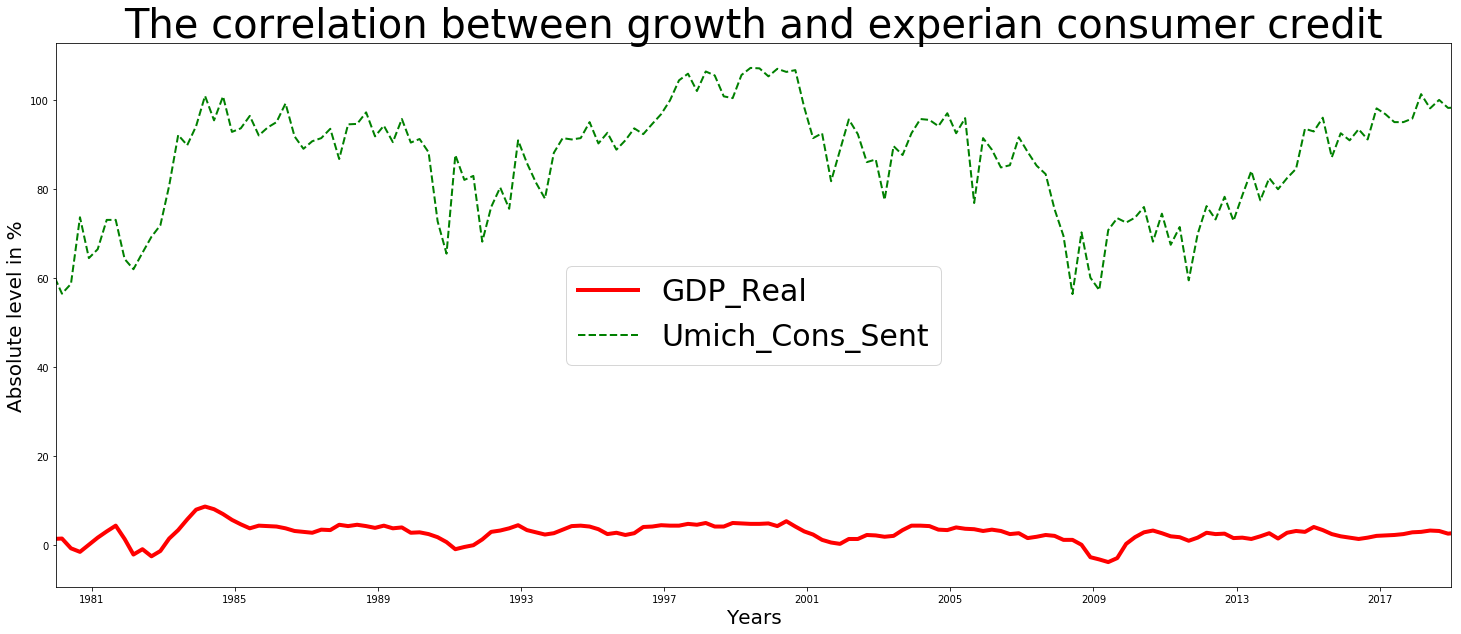

In [33]:
fig, ax = plt.subplots(figsize = (25,10))

plt.plot('GDP_Real', data=econ_credit_data, marker='', markerfacecolor='', markersize=12, color='red', linewidth=4)
plt.plot('Umich_Cons_Sent', data=econ_credit_data, marker='', color='green', linewidth=2, linestyle='dashed')
# plt.annotate(2008,10,"Great Recession")
# plt.annotate('Great recession!', xy=(2008, 5), xytext=(2008,10),arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_xlim("1980","2019")
ax.set_xlabel("Years", fontsize = 20)
ax.set_ylabel("Absolute level in %", fontsize = 20)
ax.legend(loc="best",fontsize = 30 )
ax.set_title("The correlation between growth and experian consumer credit", fontsize = 40)
pass

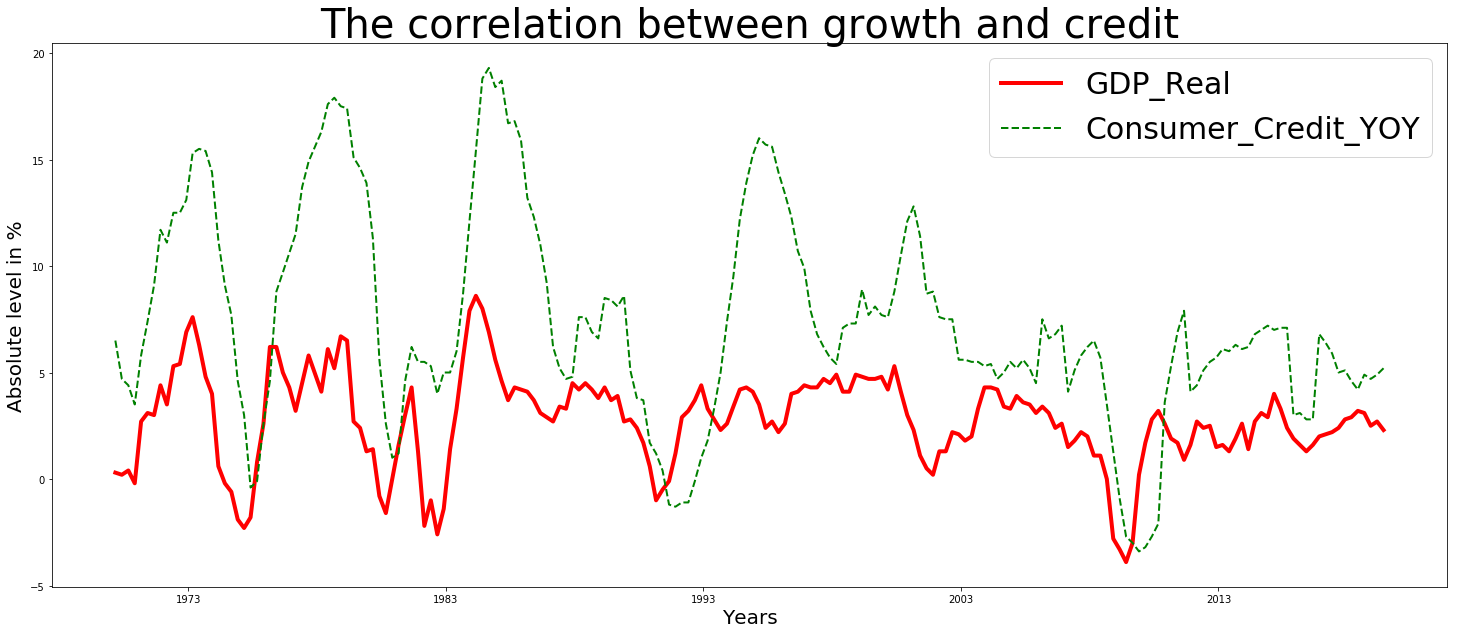

In [34]:
fig, ax = plt.subplots(figsize = (25,10))

plt.plot('GDP_Real', data=econ_credit_data, marker='', markerfacecolor='', markersize=12, color='red', linewidth=4)
plt.plot('Consumer_Credit_YOY', data=econ_credit_data, marker='', color='green', linewidth=2, linestyle='dashed')
# plt.annotate(2008,10,"Great Recession")
# plt.annotate('Great recession!', xy=(2008, 5), xytext=(2008,10),arrowprops=dict(facecolor='black', shrink=0.05))

# ax.set_xlim("2006","2009")
ax.set_xlabel("Years", fontsize = 20)
ax.set_ylabel("Absolute level in %", fontsize = 20)
ax.legend(loc="best",fontsize = 30 )
ax.set_title("The correlation between growth and credit", fontsize = 40)
pass



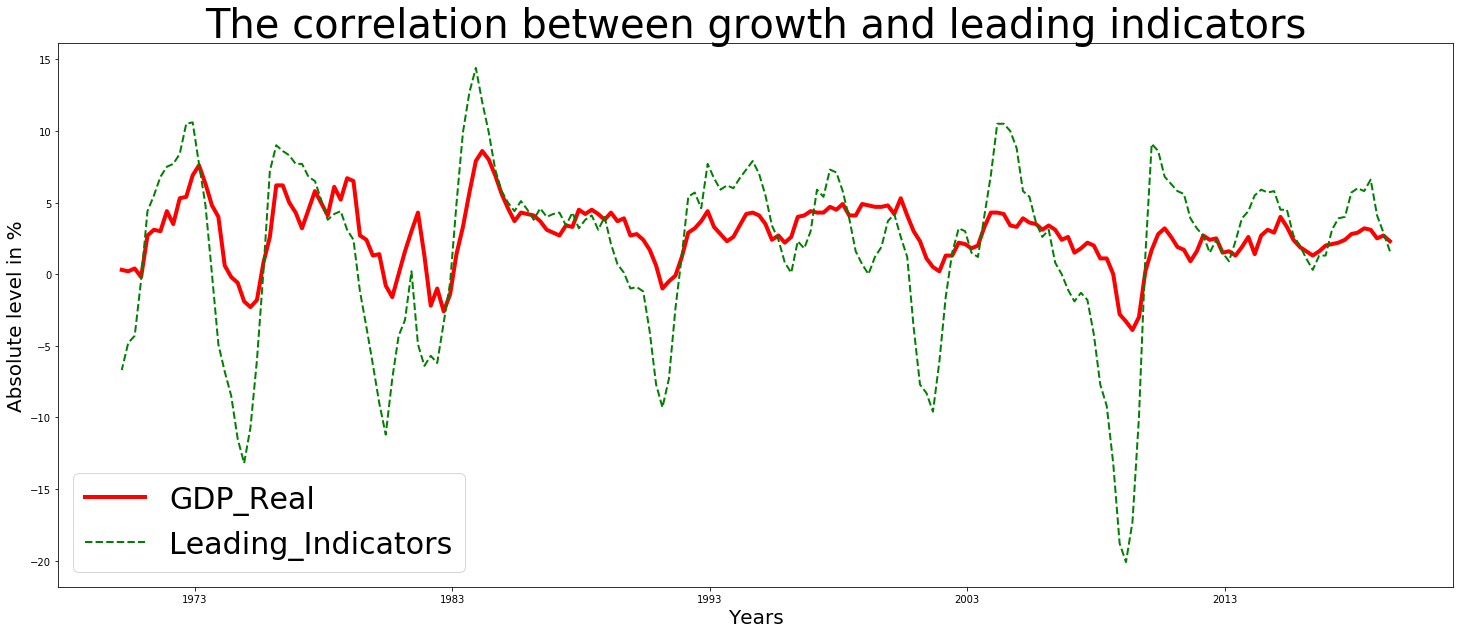

In [35]:
fig, ax = plt.subplots(figsize = (25,10))

plt.plot('GDP_Real', data=econ_credit_data, marker='', markerfacecolor='', markersize=12, color='red', linewidth=4)
plt.plot('Leading_Indicators', data=econ_credit_data, marker='', color='green', linewidth=2, linestyle='dashed')
# plt.annotate(2008,10,"Great Recession")
# plt.annotate('Great recession!', xy=(2008, 5), xytext=(2008,10),arrowprops=dict(facecolor='black', shrink=0.05))

# ax.set_xlim("2006","2009")
ax.set_xlabel("Years", fontsize = 20)
ax.set_ylabel("Absolute level in %", fontsize = 20)
ax.legend(loc="best",fontsize = 30 )
ax.set_title("The correlation between growth and leading indicators", fontsize = 40)
pass

### Focusining in on credit and leading indicators

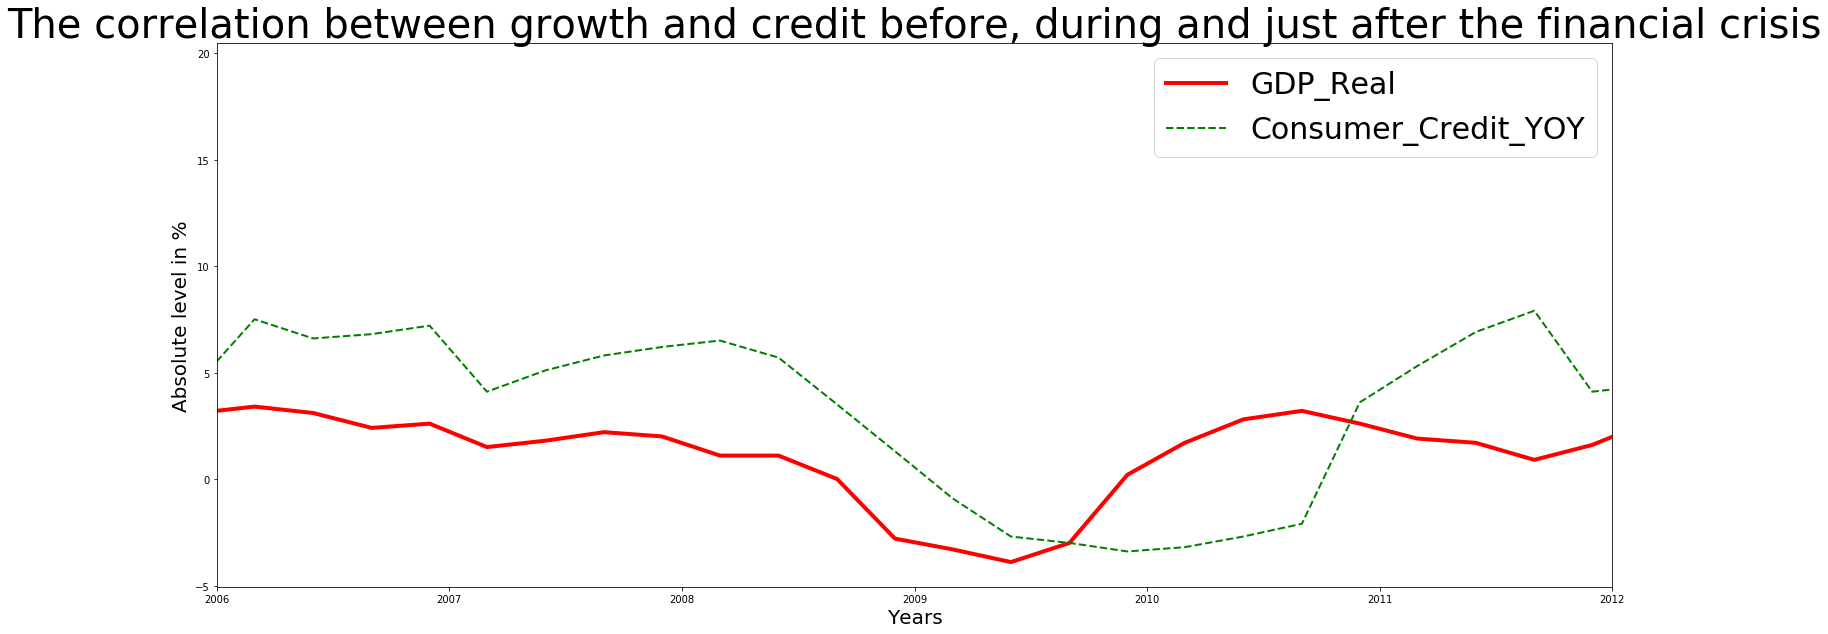

In [36]:
fig, ax = plt.subplots(figsize = (25,10))

plt.plot('GDP_Real', data=econ_credit_data, marker='', markerfacecolor='', markersize=12, color='red', linewidth=4)
plt.plot('Consumer_Credit_YOY', data=econ_credit_data, marker='', color='green', linewidth=2, linestyle='dashed')
# plt.annotate(2008,10,"Great Recession")
# plt.annotate('Great recession!', xy=(2008, 5), xytext=(2008,10),arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_xlim("2006","2012")
ax.set_xlabel("Years", fontsize = 20)
ax.set_ylabel("Absolute level in %", fontsize = 20)
ax.legend(loc="best",fontsize = 30 )
ax.set_title("The correlation between growth and credit before, during and just after the financial crisis", fontsize = 40)
pass

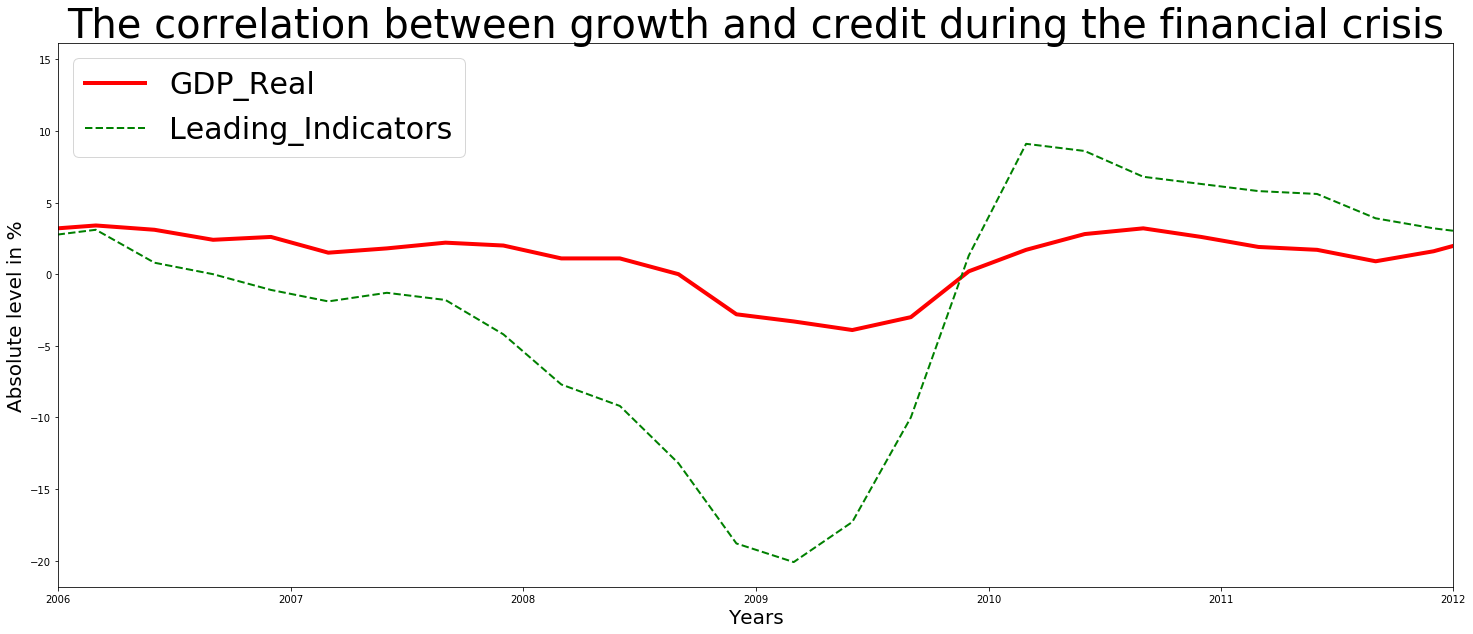

In [37]:
fig, ax = plt.subplots(figsize = (25,10))

plt.plot('GDP_Real', data=econ_credit_data, marker='', markerfacecolor='', markersize=12, color='red', linewidth=4)
plt.plot('Leading_Indicators', data=econ_credit_data, marker='', color='green', linewidth=2, linestyle='dashed')
# plt.annotate(2008,10,"Great Recession")
# plt.annotate('Great recession!', xy=(2008, 5), xytext=(2008,10),arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_xlim("2006","2012")
ax.set_xlabel("Years", fontsize = 20)
ax.set_ylabel("Absolute level in %", fontsize = 20)
ax.legend(loc="best",fontsize = 30 )
ax.set_title("The correlation between growth and credit during the financial crisis", fontsize = 40)
pass

### Jade Chia-chun Hou

### Part 0: Import 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from datetime import datetime
sns.set()

import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')
                                   
%matplotlib inline

### Part 1: Data Preprocessing

In [94]:
#######################
# Read the Finance data
#######################

#use the ExcelFile class to read the file
data = pd.ExcelFile('Master Data Final.xlsx')

# see all sheet names
sheet_name = data.sheet_names

#store the data in 4 data frames
econ = data.parse(sheet_name[0])
stock = data.parse(sheet_name[1])
commodity = data.parse(sheet_name[2])
credit = data.parse(sheet_name[3])

# display the head of dataframe
display(econ.head())
display(stock.head())
display(commodity.head())
display(credit.head())


Date  Fed Funds Rate  GDP Nominal (%)  GDP Real  Inflation  \
0 2019-06-28            2.38              4.0       2.3        1.6   
1 2019-03-29            2.41              4.6       2.7        1.9   
2 2018-12-31            2.27              4.9       2.5        1.9   
3 2018-09-28            1.95              5.8       3.1        2.3   
4 2018-06-29            1.82              6.0       3.2        2.9   

   Unemployment  FED Consumer Credit Change($Bn)  \
0          3.63                           17.086   
1          3.87                           10.982   
2          3.80                           11.997   
3          3.80                           14.311   
4          3.90                            8.875   

   FED Consumer Credit change(YOY%)  NY FED Recession Index  \
0                               5.2                   12.51   
1                               4.9                   10.84   
2                               4.7                   11.46   
3                               4.9                   10.33   
4                               4.2                    9.87   

   Confernce Board Leading Indicators Index  
0                                       1.6  
1                                       2.9  
2                                       4.1  
3                                       6.6  
4                                       5.8

Date  S&P 500 TR Index  MSCI World Stocks  EURO STOXX 50  \
0 2019-06-28           2941.76            2178.35        3473.69   
1 2019-05-31           2752.06            2046.25        3280.43   
2 2019-04-30           2945.83            2178.67        3514.62   
3 2019-03-29           2834.40            2107.74        3351.71   
4 2019-02-28           2784.49            2085.84        3298.26   

   MSCI APAC Stocks  MSCI EM Index  Nasdaq Index   Bitcoin  \
0            160.05        1054.86      8006.244  12212.70   
1            152.36         998.00      7453.148   8503.38   
2            162.36        1079.24      8095.388   5237.87   
3            159.81        1058.13      7729.321   4072.16   
4            158.69        1050.95      7532.532   3802.53   

   Citigroup Economic Surprise Index  US Dollar Index  
0                              -68.3           96.130  
1                              -32.3           97.750  
2                              -58.7           97.479  
3                              -35.9           97.284  
4                              -29.8           96.157

Date     Gold   Silver  Oil Index  NatGas Index  Agriculture Index  \
0 2019-06-28  1409.55  15.3150    488.916      15.83163           354.7374   
1 2019-05-31  1305.58  14.5942    448.499      16.76547           353.5957   
2 2019-04-30  1283.53  14.9525    535.766      17.79443           322.1981   
3 2019-03-29  1292.38  15.1183    503.268      18.64069           333.5600   
4 2019-02-28  1313.32  15.6120    480.793      19.72403           338.9276   

   Soybean Index  Corn Index  Wheat Index  WTI_Oil  
0       3579.369     74.3491      74.2323    54.66  
1       3504.901     75.9928      71.2631    60.83  
2       3403.133     64.3832      60.6207    63.86  
3       3567.618     64.6971      65.1003    58.15  
4       3665.369     67.1522      65.2221    54.95

Date  S&P/Experian Consumer Credit  Umich Consumer Sentiment  \
0 2019-06-30                           NaN                      98.2   
1 2019-05-31                          0.83                     100.0   
2 2019-04-30                          0.88                      97.2   
3 2019-03-31                          0.92                      98.4   
4 2019-02-28                          0.92                      93.8   

   Umich Consumer Expectation  Citigroup Economic Surprise Index  \
0                        89.3                              -68.3   
1                        93.5                              -32.3   
2                        87.4                              -58.7   
3                        88.8                              -35.9   
4                        84.4                              -29.8   

   FED Consumer Credit Change($Bn)  FED Consumer Credit change(YOY%)  \
0                              NaN                               NaN   
1                           17.086                               5.2   
2                           17.457                               5.3   
3                           10.982                               4.9   
4                           15.500                               4.9   

   NY FED Recession probability Index  \
0                               12.51   
1                               11.12   
2                               11.21   
3                               10.84   
4                                9.14   

   Confernce Board Leading Indicators Index  
0                                       1.6  
1                                       2.5  
2                                       2.5  
3                                       2.9  
4                                       3.0

In [95]:
#####################################
# Rename the column of each dataframe
#####################################

# rename the column
econ.columns = ['Date', 'Fed_Rate', 'GDP_Nominal', 'GDP_Real', 'Inflation',
       'Unemployment', 'Consumer_Credit_USD',
       'Consumer_Credit_YOY', 'FED_Recession_Index', 'CB_Leading_Indic']

stock.columns = ['Date', 'S&P_Index', 'MSCI_World', 'EURO_STOXX',
       'MSCI_APAC', 'MSCI_EM', 'Nasdaq_Index', 'Bitcoin',
       'Citi_econ_surprise','USD_Index']

commodity.columns = ['Date', 'Gold', 'Silver', 'Oil', 'NatGas',
       'Agriculture', 'Soybean', 'Corn', 'Wheat', 'WTI_Oil']

credit.columns = ['Date', 'Experian_Cons_Credit', 'Umich_Cons_Sent',
       'Umich_Cons_Expect', 'Citi_econ_surprise',
       'Consumer_Credit_USD)', 'Consumer_Credit_YOY',
       'FED_Recession_Index',
       'Leading_Indicators']

# display the head of dataframe
display(econ.head())
display(stock.head())
display(commodity.head())
display(credit.head())


Date  Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
0 2019-06-28      2.38          4.0       2.3        1.6          3.63   
1 2019-03-29      2.41          4.6       2.7        1.9          3.87   
2 2018-12-31      2.27          4.9       2.5        1.9          3.80   
3 2018-09-28      1.95          5.8       3.1        2.3          3.80   
4 2018-06-29      1.82          6.0       3.2        2.9          3.90   

   Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
0               17.086                  5.2                12.51   
1               10.982                  4.9                10.84   
2               11.997                  4.7                11.46   
3               14.311                  4.9                10.33   
4                8.875                  4.2                 9.87   

   CB_Leading_Indic  
0               1.6  
1               2.9  
2               4.1  
3               6.6  
4               5.8

Date  S&P_Index  MSCI_World  EURO_STOXX  MSCI_APAC  MSCI_EM  \
0 2019-06-28    2941.76     2178.35     3473.69     160.05  1054.86   
1 2019-05-31    2752.06     2046.25     3280.43     152.36   998.00   
2 2019-04-30    2945.83     2178.67     3514.62     162.36  1079.24   
3 2019-03-29    2834.40     2107.74     3351.71     159.81  1058.13   
4 2019-02-28    2784.49     2085.84     3298.26     158.69  1050.95   

   Nasdaq_Index   Bitcoin  Citi_econ_surprise  USD_Index  
0      8006.244  12212.70               -68.3     96.130  
1      7453.148   8503.38               -32.3     97.750  
2      8095.388   5237.87               -58.7     97.479  
3      7729.321   4072.16               -35.9     97.284  
4      7532.532   3802.53               -29.8     96.157

Date     Gold   Silver      Oil    NatGas  Agriculture   Soybean  \
0 2019-06-28  1409.55  15.3150  488.916  15.83163     354.7374  3579.369   
1 2019-05-31  1305.58  14.5942  448.499  16.76547     353.5957  3504.901   
2 2019-04-30  1283.53  14.9525  535.766  17.79443     322.1981  3403.133   
3 2019-03-29  1292.38  15.1183  503.268  18.64069     333.5600  3567.618   
4 2019-02-28  1313.32  15.6120  480.793  19.72403     338.9276  3665.369   

      Corn    Wheat  WTI_Oil  
0  74.3491  74.2323    54.66  
1  75.9928  71.2631    60.83  
2  64.3832  60.6207    63.86  
3  64.6971  65.1003    58.15  
4  67.1522  65.2221    54.95

Date  Experian_Cons_Credit  Umich_Cons_Sent  Umich_Cons_Expect  \
0 2019-06-30                   NaN             98.2               89.3   
1 2019-05-31                  0.83            100.0               93.5   
2 2019-04-30                  0.88             97.2               87.4   
3 2019-03-31                  0.92             98.4               88.8   
4 2019-02-28                  0.92             93.8               84.4   

   Citi_econ_surprise  Consumer_Credit_USD)  Consumer_Credit_YOY  \
0               -68.3                   NaN                  NaN   
1               -32.3                17.086                  5.2   
2               -58.7                17.457                  5.3   
3               -35.9                10.982                  4.9   
4               -29.8                15.500                  4.9   

   FED_Recession_Index  Leading_Indicators  
0                12.51                 1.6  
1                11.12                 2.5  
2                11.21                 2.5  
3                10.84                 2.9  
4                 9.14                 3.0

In [96]:
###########################################
# Data Preprocessing
# 1. Quarterly: Econ data
# 2. Monthly: stock, commodity, credit data
###########################################

######
# econ

econ['year'] = econ.Date.dt.year
econ['month'] = econ.Date.dt.month
econ['date'] = econ.Date.dt.day
econ.drop(["year","month","date"], axis =1, inplace=True)
print(econ.dtypes)
econ.tail()


Date                   datetime64[ns]
Fed_Rate                      float64
GDP_Nominal                   float64
GDP_Real                      float64
Inflation                     float64
Unemployment                  float64
Consumer_Credit_USD           float64
Consumer_Credit_YOY           float64
FED_Recession_Index           float64
CB_Leading_Indic              float64
dtype: object


Date  Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
193 1971-03-31      3.71          8.0       2.7        4.7          5.93   
194 1970-12-31      4.90          4.9      -0.2        5.6           NaN   
195 1970-09-30      6.29          5.4       0.4        5.7           NaN   
196 1970-06-30      7.60          5.8       0.2        6.0           NaN   
197 1970-03-31      7.76          5.8       0.3        5.8           NaN   

     Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
193                  NaN                  5.8                  NaN   
194                  NaN                  3.5                  NaN   
195                  NaN                  4.4                  NaN   
196                  NaN                  4.7                  NaN   
197                  NaN                  6.5                  NaN   

     CB_Leading_Indic  
193               2.9  
194              -1.8  
195              -4.6  
196              -5.6  
197              -5.2

In [98]:
#######
# stock 

stock['year'] = stock.Date.dt.year.fillna("1900").astype("int")
stock['month'] = stock.Date.dt.month.fillna("1").astype("int")
stock['date'] = stock.Date.dt.day
stock.drop(["year","month","date"], axis =1, inplace=True)
print(stock.dtypes)
stock.tail()
stock.to_csv('stock.csv')

Date                  datetime64[ns]
S&P_Index                    float64
MSCI_World                   float64
EURO_STOXX                   float64
MSCI_APAC                    float64
MSCI_EM                      float64
Nasdaq_Index                 float64
Bitcoin                      float64
Citi_econ_surprise           float64
USD_Index                    float64
dtype: object


In [65]:
########
# credit

credit['year'] = credit.Date.dt.year.fillna("1900").astype("int")
credit['month'] = credit.Date.dt.month.fillna("1").astype("int")
credit['date'] = credit.Date.dt.day
credit.drop(["year","month","date"], axis =1, inplace=True)
print(credit.dtypes)
credit.tail()

Date                    datetime64[ns]
Experian_Cons_Credit           float64
Umich_Cons_Sent                float64
Umich_Cons_Expect              float64
Citi_econ_surprise             float64
Consumer_Credit_USD)           float64
Consumer_Credit_YOY            float64
FED_Recession_Index            float64
Leading_Indicators             float64
dtype: object


Date  Experian_Cons_Credit  Umich_Cons_Sent  Umich_Cons_Expect  \
588 1970-05-31                   0.0              0.0                0.0   
589 1970-04-30                   0.0              0.0                0.0   
590 1970-03-31                   0.0              0.0                0.0   
591 1970-02-28                   0.0              0.0                0.0   
592 1970-01-31                   0.0              0.0                0.0   

     Citi_econ_surprise  Consumer_Credit_USD)  Consumer_Credit_YOY  \
588                 0.0                   NaN                  4.7   
589                 0.0                   NaN                  4.9   
590                 0.0                   NaN                  5.6   
591                 0.0                   NaN                  6.5   
592                 0.0                   NaN                  7.3   

     FED_Recession_Index  Leading_Indicators  
588                31.19                -5.6  
589                27.51                -6.2  
590                32.42                -6.7  
591                27.49                -5.2  
592                32.20                -4.4

In [66]:
###########
# commodity

commodity['year'] = commodity.Date.dt.year.fillna("1900").astype("int")
commodity['month'] = commodity.Date.dt.month.fillna("1").astype("int")
commodity['date'] = commodity.Date.dt.day
commodity.drop(["year","month","date"], axis =1, inplace=True)
print(commodity.dtypes)
commodity.tail()

Date           datetime64[ns]
Gold                  float64
Silver                float64
Oil                   float64
NatGas                float64
Agriculture           float64
Soybean               float64
Corn                  float64
Wheat                 float64
WTI_Oil               float64
dtype: object


Date   Gold  Silver  Oil  NatGas  Agriculture  Soybean      Corn  \
589 1970-05-29  35.95   1.631  0.0     0.0     104.8636  107.263  108.0883   
590 1970-04-30  35.62   1.724  0.0     0.0     107.2068  105.743  107.3949   
591 1970-03-31  35.09   1.878  0.0     0.0     102.1295  103.180  102.2223   
592 1970-02-27  34.99   1.899  0.0     0.0     102.8170  103.249  101.8114   
593 1970-01-30  34.94   1.912  0.0     0.0      99.1626  101.545  100.0234   

        Wheat  WTI_Oil  
589  102.2507     3.35  
590  107.5514     3.35  
591  101.9164     3.35  
592  103.4071     3.35  
593   98.1714     3.35

In [67]:
##########################
# Merge Data: Econ + stock
# Output: quarterly data
##########################

econ_stock = econ.merge(stock, how = 'inner', on = ['Date'])
econ_stock.head()

# output the file as csv
#econ_stock.to_csv('./data/econ_stock.csv')

econ_stock.to_csv('econ_stock.csv')

### Part 2: Data Visualization

In [68]:
###################
# Read the csv file
###################

econ_stock = pd.read_csv("econ_stock.csv") 
econ_stock = econ_stock.iloc[:, 1:]
econ_stock = econ_stock.sort_values(by='Date', ascending = True)
econ_stock.head()

Date  Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
197  1970-03-31      7.76          5.8       0.3        5.8           NaN   
196  1970-06-30      7.60          5.8       0.2        6.0           NaN   
195  1970-09-30      6.29          5.4       0.4        5.7           NaN   
194  1970-12-31      4.90          4.9      -0.2        5.6           NaN   
193  1971-03-31      3.71          8.0       2.7        4.7          5.93   

     Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
197                  NaN                  6.5                  NaN   
196                  NaN                  4.7                  NaN   
195                  NaN                  4.4                  NaN   
194                  NaN                  3.5                  NaN   
193                  NaN                  5.8                  NaN   

     CB_Leading_Indic  S&P_Index  MSCI_World  EURO_STOXX  MSCI_APAC  MSCI_EM  \
197              -5.2      89.63       97.07         0.0        0.0      0.0   
196              -5.6      72.72       79.84         0.0        0.0      0.0   
195              -4.6      84.21       89.79         0.0        0.0      0.0   
194              -1.8      92.15       94.29         0.0        0.0      0.0   
193               2.9     100.31      103.41         0.0        0.0      0.0   

     Nasdaq_Index  Bitcoin  Citi_econ_surprise  USD_Index  
197          0.00      0.0                 0.0        NaN  
196          0.00      0.0                 0.0        NaN  
195          0.00      0.0                 0.0        NaN  
194          0.00      0.0                 0.0        NaN  
193        105.97      0.0                 0.0        NaN

In [47]:
######################################################
# Calculate the spearman correlation of each variables
######################################################

econ_stock.corr(method ='spearman') 

Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
Fed_Rate             1.000000     0.669740  0.205918   0.729638      0.031699   
GDP_Nominal          0.669740     1.000000  0.627325   0.667146      0.033278   
GDP_Real             0.205918     0.627325  1.000000   0.030761     -0.202527   
Inflation            0.729638     0.667146  0.030761   1.000000      0.181047   
Unemployment         0.031699     0.033278 -0.202527   0.181047      1.000000   
Consumer_Credit_USD -0.273142    -0.056395  0.083134  -0.401055     -0.363184   
Consumer_Credit_YOY  0.375443     0.466546  0.552440   0.176492     -0.209392   
FED_Recession_Index  0.398978    -0.048797 -0.121184   0.193826     -0.530362   
CB_Leading_Indic    -0.206263     0.294930  0.688251  -0.220334      0.128244   
S&P_Index           -0.716315    -0.673722 -0.126674  -0.749034     -0.441430   
MSCI_World          -0.699459    -0.662525 -0.125163  -0.732563     -0.444581   
EURO_STOXX          -0.654726    -0.624630 -0.132053  -0.661421     -0.565393   
MSCI_APAC           -0.621941    -0.580649 -0.145504  -0.575999     -0.418528   
MSCI_EM             -0.780902    -0.683785 -0.212708  -0.680802     -0.305165   
Nasdaq_Index        -0.718077    -0.675195 -0.129448  -0.752688     -0.410144   
Bitcoin             -0.602830    -0.442335 -0.195759  -0.490151     -0.111097   
Citi_econ_surprise   0.006451     0.007361 -0.015965   0.088895      0.125702   
USD_Index            0.519902     0.216706  0.311817  -0.261238     -0.787567   

                     Consumer_Credit_USD  Consumer_Credit_YOY  \
Fed_Rate                       -0.273142             0.375443   
GDP_Nominal                    -0.056395             0.466546   
GDP_Real                        0.083134             0.552440   
Inflation                      -0.401055             0.176492   
Unemployment                   -0.363184            -0.209392   
Consumer_Credit_USD             1.000000             0.378581   
Consumer_Credit_YOY             0.378581             1.000000   
FED_Recession_Index            -0.001740             0.170464   
CB_Leading_Indic                0.142773             0.226946   
S&P_Index                       0.632762            -0.272376   
MSCI_World                      0.608543            -0.265683   
EURO_STOXX                      0.503520            -0.235540   
MSCI_APAC                       0.398209            -0.262963   
MSCI_EM                         0.394814            -0.345212   
Nasdaq_Index                    0.596820            -0.274846   
Bitcoin                         0.483130            -0.230344   
Citi_econ_surprise             -0.201363            -0.022012   
USD_Index                       0.530092             0.165304   

                     FED_Recession_Index  CB_Leading_Indic  S&P_Index  \
Fed_Rate                        0.398978         -0.206263  -0.716315   
GDP_Nominal                    -0.048797          0.294930  -0.673722   
GDP_Real                       -0.121184          0.688251  -0.126674   
Inflation                       0.193826         -0.220334  -0.749034   
Unemployment                   -0.530362          0.128244  -0.441430   
Consumer_Credit_USD            -0.001740          0.142773   0.632762   
Consumer_Credit_YOY             0.170464          0.226946  -0.272376   
FED_Recession_Index             1.000000         -0.616077   0.118085   
CB_Leading_Indic               -0.616077          1.000000   0.023240   
S&P_Index                       0.118085          0.023240   1.000000   
MSCI_World                      0.115245          0.014278   0.995536   
EURO_STOXX                      0.342547         -0.084486   0.930712   
MSCI_APAC                       0.018892         -0.000079   0.865797   
MSCI_EM                        -0.102600          0.027199   0.916952   
Nasdaq_Index                    0.055833          0.026741   0.993981   
Bitcoin                        -0.145909          0.111301   0.642077   
Citi

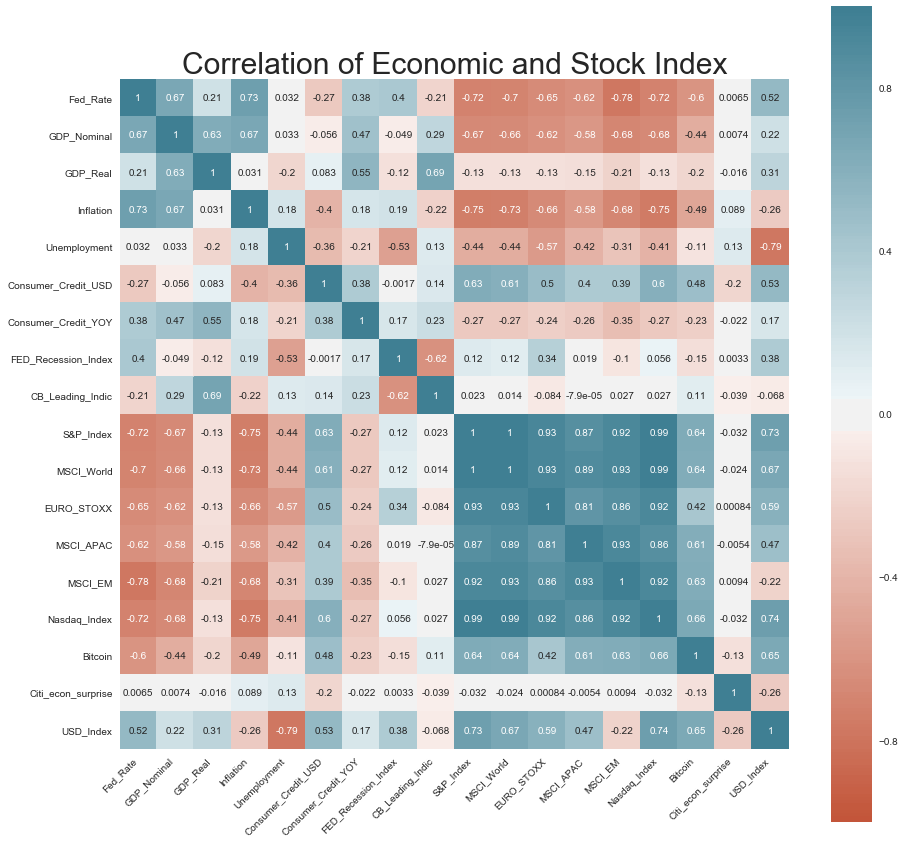

In [69]:
###################################################################
# Heatmap for correlations between variables in stock and enco data
###################################################################

# calculate the spearman correlation of each variables
corr = econ_stock.corr(method ='spearman')

# set the figure size
plt.figure(figsize=(15,15))

# plot the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

# rotate the xlabel of the heatmap
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# add title for the heatmap
ax.set_title('Correlation of Economic and Stock Index', fontsize = 30);

# output the firgure as png file
fig = ax.get_figure()
fig.savefig('Correlation of Economic and Stock Index.png')

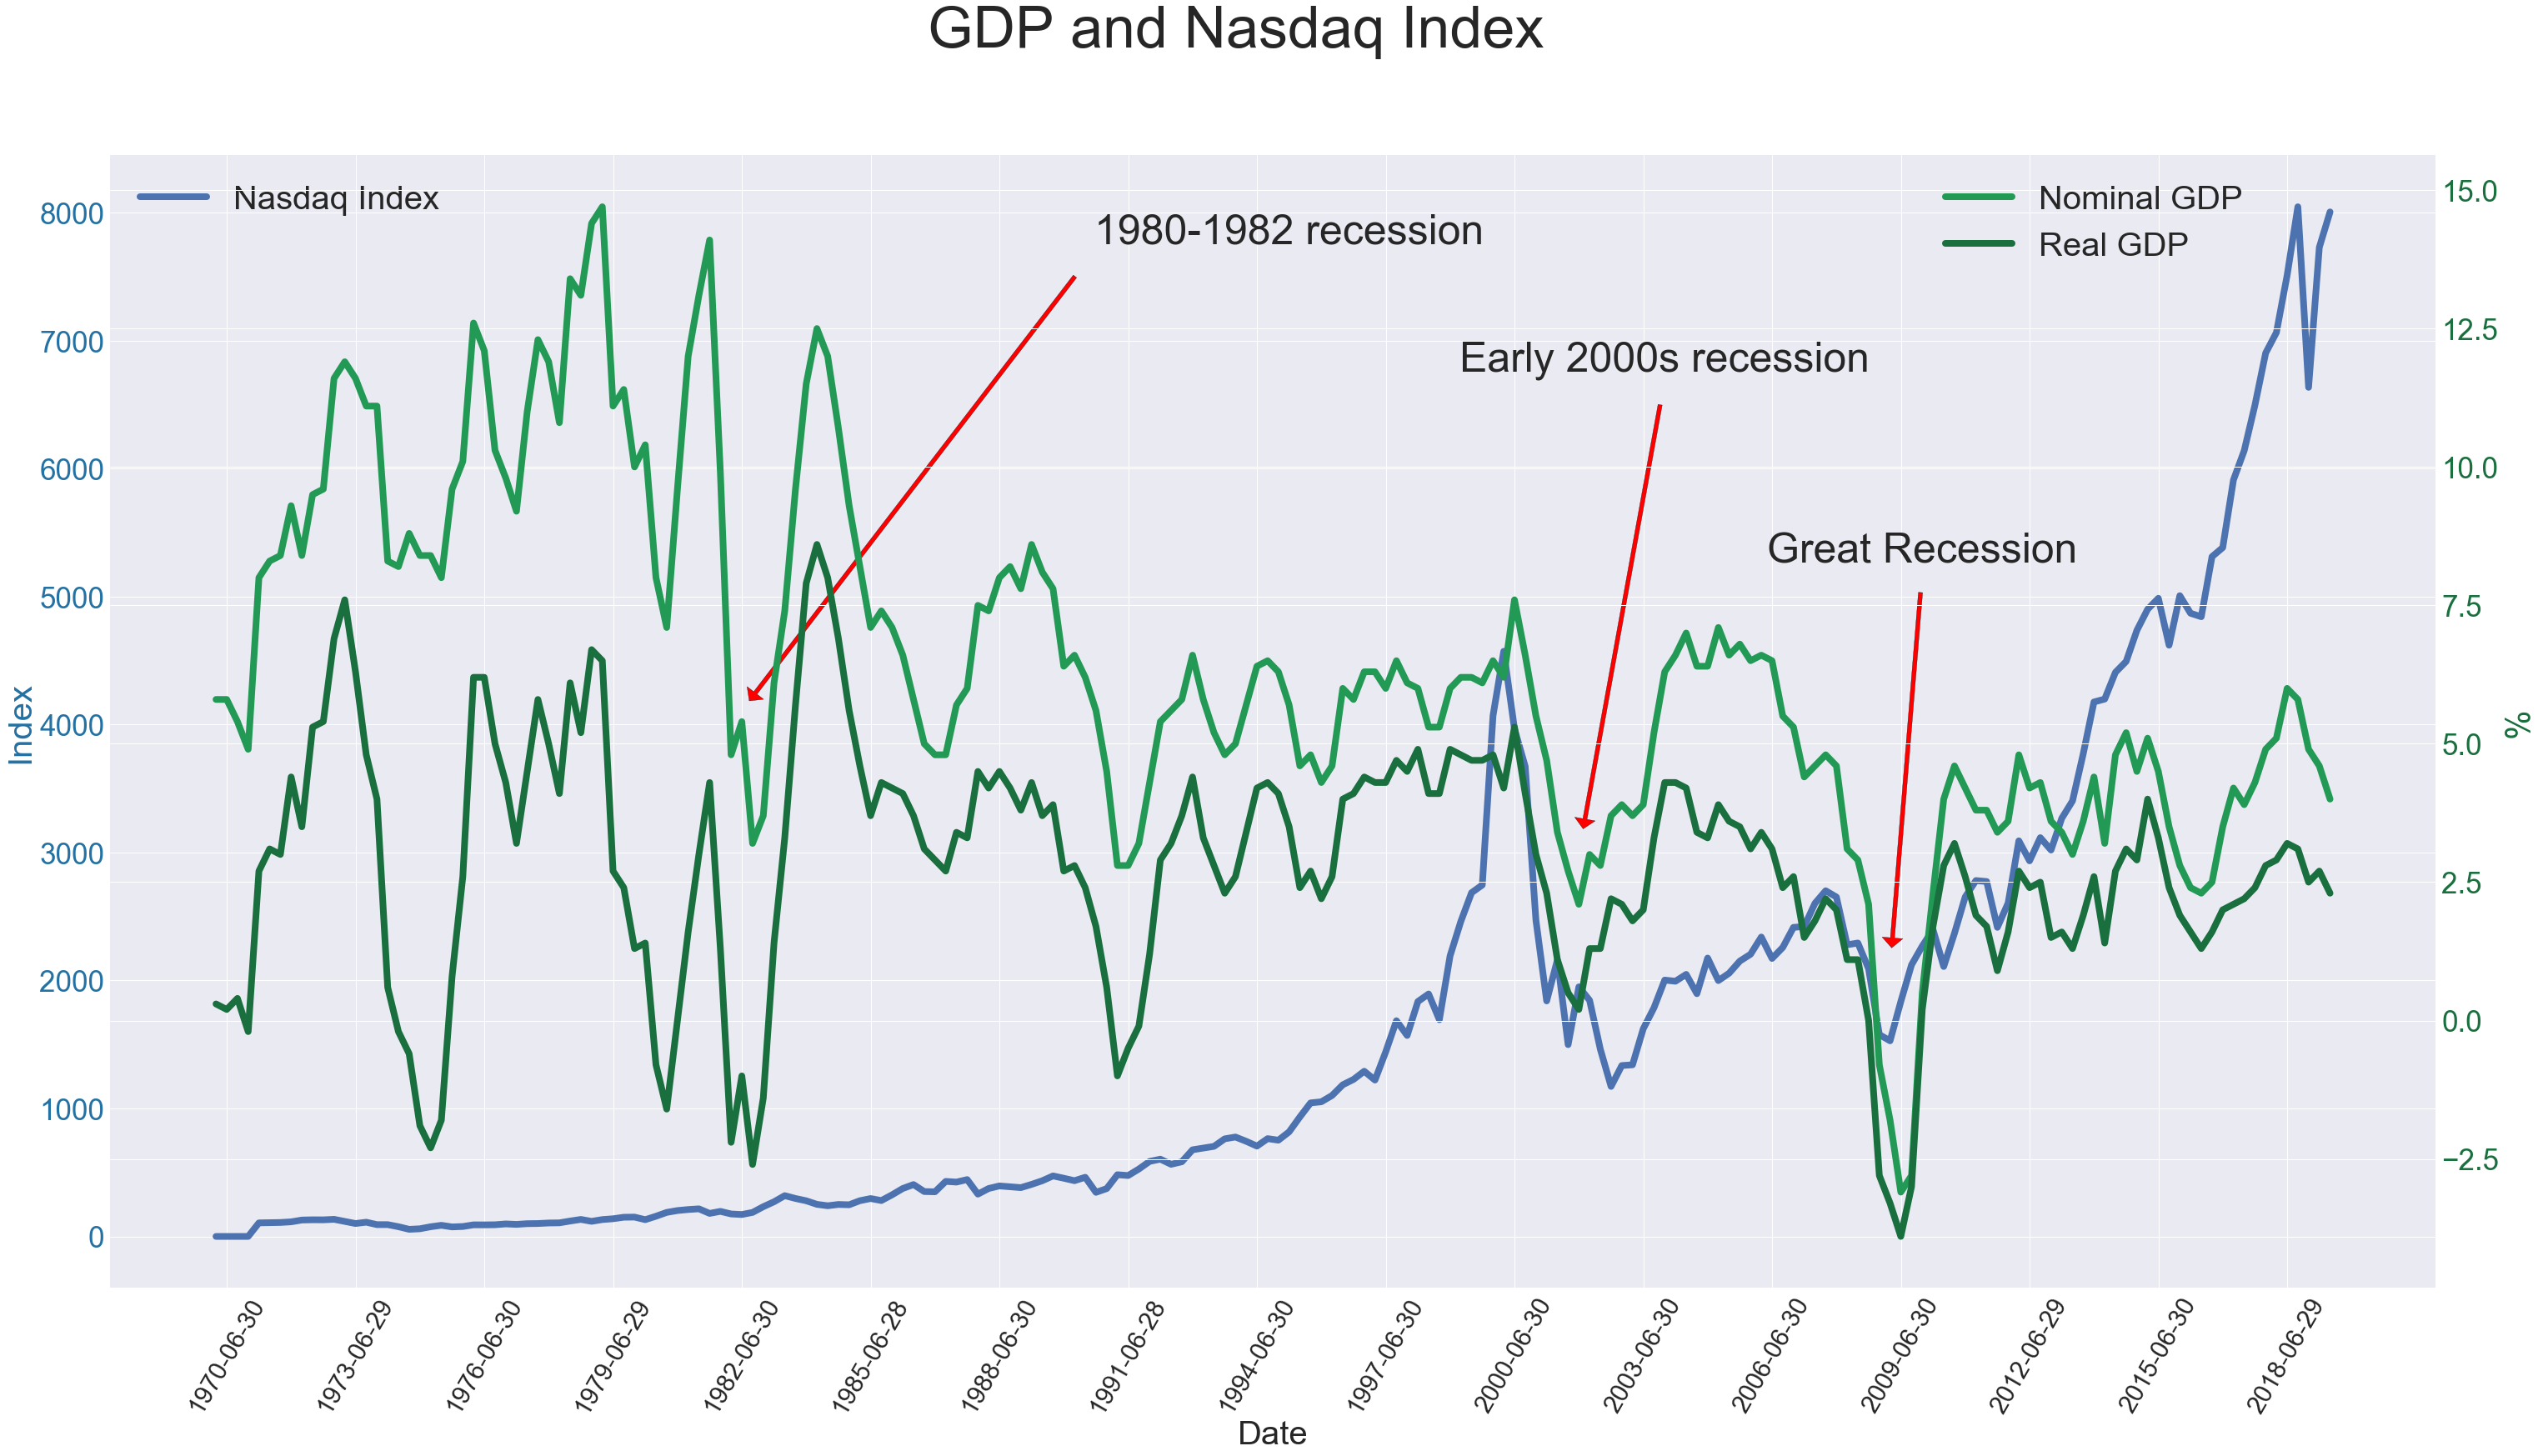

In [70]:
# set the figure size
fig, ax1 = plt.subplots(figsize = (50,25))

# add the x-axis and the y-axis to the plot
color = '#2471A3'
ax1.plot(econ_stock['Date'], econ_stock['Nasdaq_Index'], linewidth=8, label='Nasdaq Index')

# set and rotate the x-axis
ax1.set_xlabel('Date', fontsize = 40)
plt.setp(ax1.get_xticklabels(), rotation= 60);
plt.xticks(range(1,len(econ_stock), 12), fontsize = 30);

# set y-axis
ax1.set_ylabel('Index', color = color, fontsize = 40)
ax1.tick_params(axis = 'y', labelcolor = color, labelsize = 35)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

##################
# Plot GDP_Nominal

# add the x-axis and the y-axis to the plot
color = '#229954'
ax2.plot(econ_stock['Date'], econ_stock['GDP_Nominal'], linewidth=8, label='Nominal GDP', color = color)

# set and rotate the x-axis
plt.setp(ax2.get_xticklabels(), rotation= 60);
plt.xticks(range(1,len(econ_stock), 12), fontsize = 30);

# set y-axis
ax2.set_ylabel('GDP', color = color, fontsize = 40)
ax2.tick_params(axis = 'y', labelcolor = color, labelsize = 35)

###############
# Plot GDP_Real

color = '#196F3D'
ax2.plot(econ_stock['Date'], econ_stock['GDP_Real'], linewidth=8, label='Real GDP', color = color)

# set and rotate the x-axis
plt.setp(ax2.get_xticklabels(), rotation= 60);
plt.xticks(range(1,len(econ_stock), 12), fontsize = 30);

# set y-axis
ax2.set_ylabel('%', color = color, fontsize = 40)
ax2.tick_params(axis = 'y', labelcolor = color, labelsize = 35)

# add legend
ax1.legend(fontsize = 40)
ax2.legend(loc = 'upper right', bbox_to_anchor=(0.43, 0.5, 0.5, 0.5), fontsize = 40)

# add title
fig.suptitle('GDP and Nasdaq Index', fontsize=70)


# add text and arrow
ax1.annotate('Great Recession', fontsize = 50, xy=(156, 2100), xytext=(159, 5500),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top')

ax1.annotate('Early 2000s recession', fontsize = 50, xy=(127, 3000), xytext=(135, 7000),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top')

ax1.annotate('1980-1982 recession', fontsize = 50, xy=(48, 4000), xytext=(100, 8000),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top');

# output the firgure as png file
fig.savefig("GDP and Nasdaq Index.png")

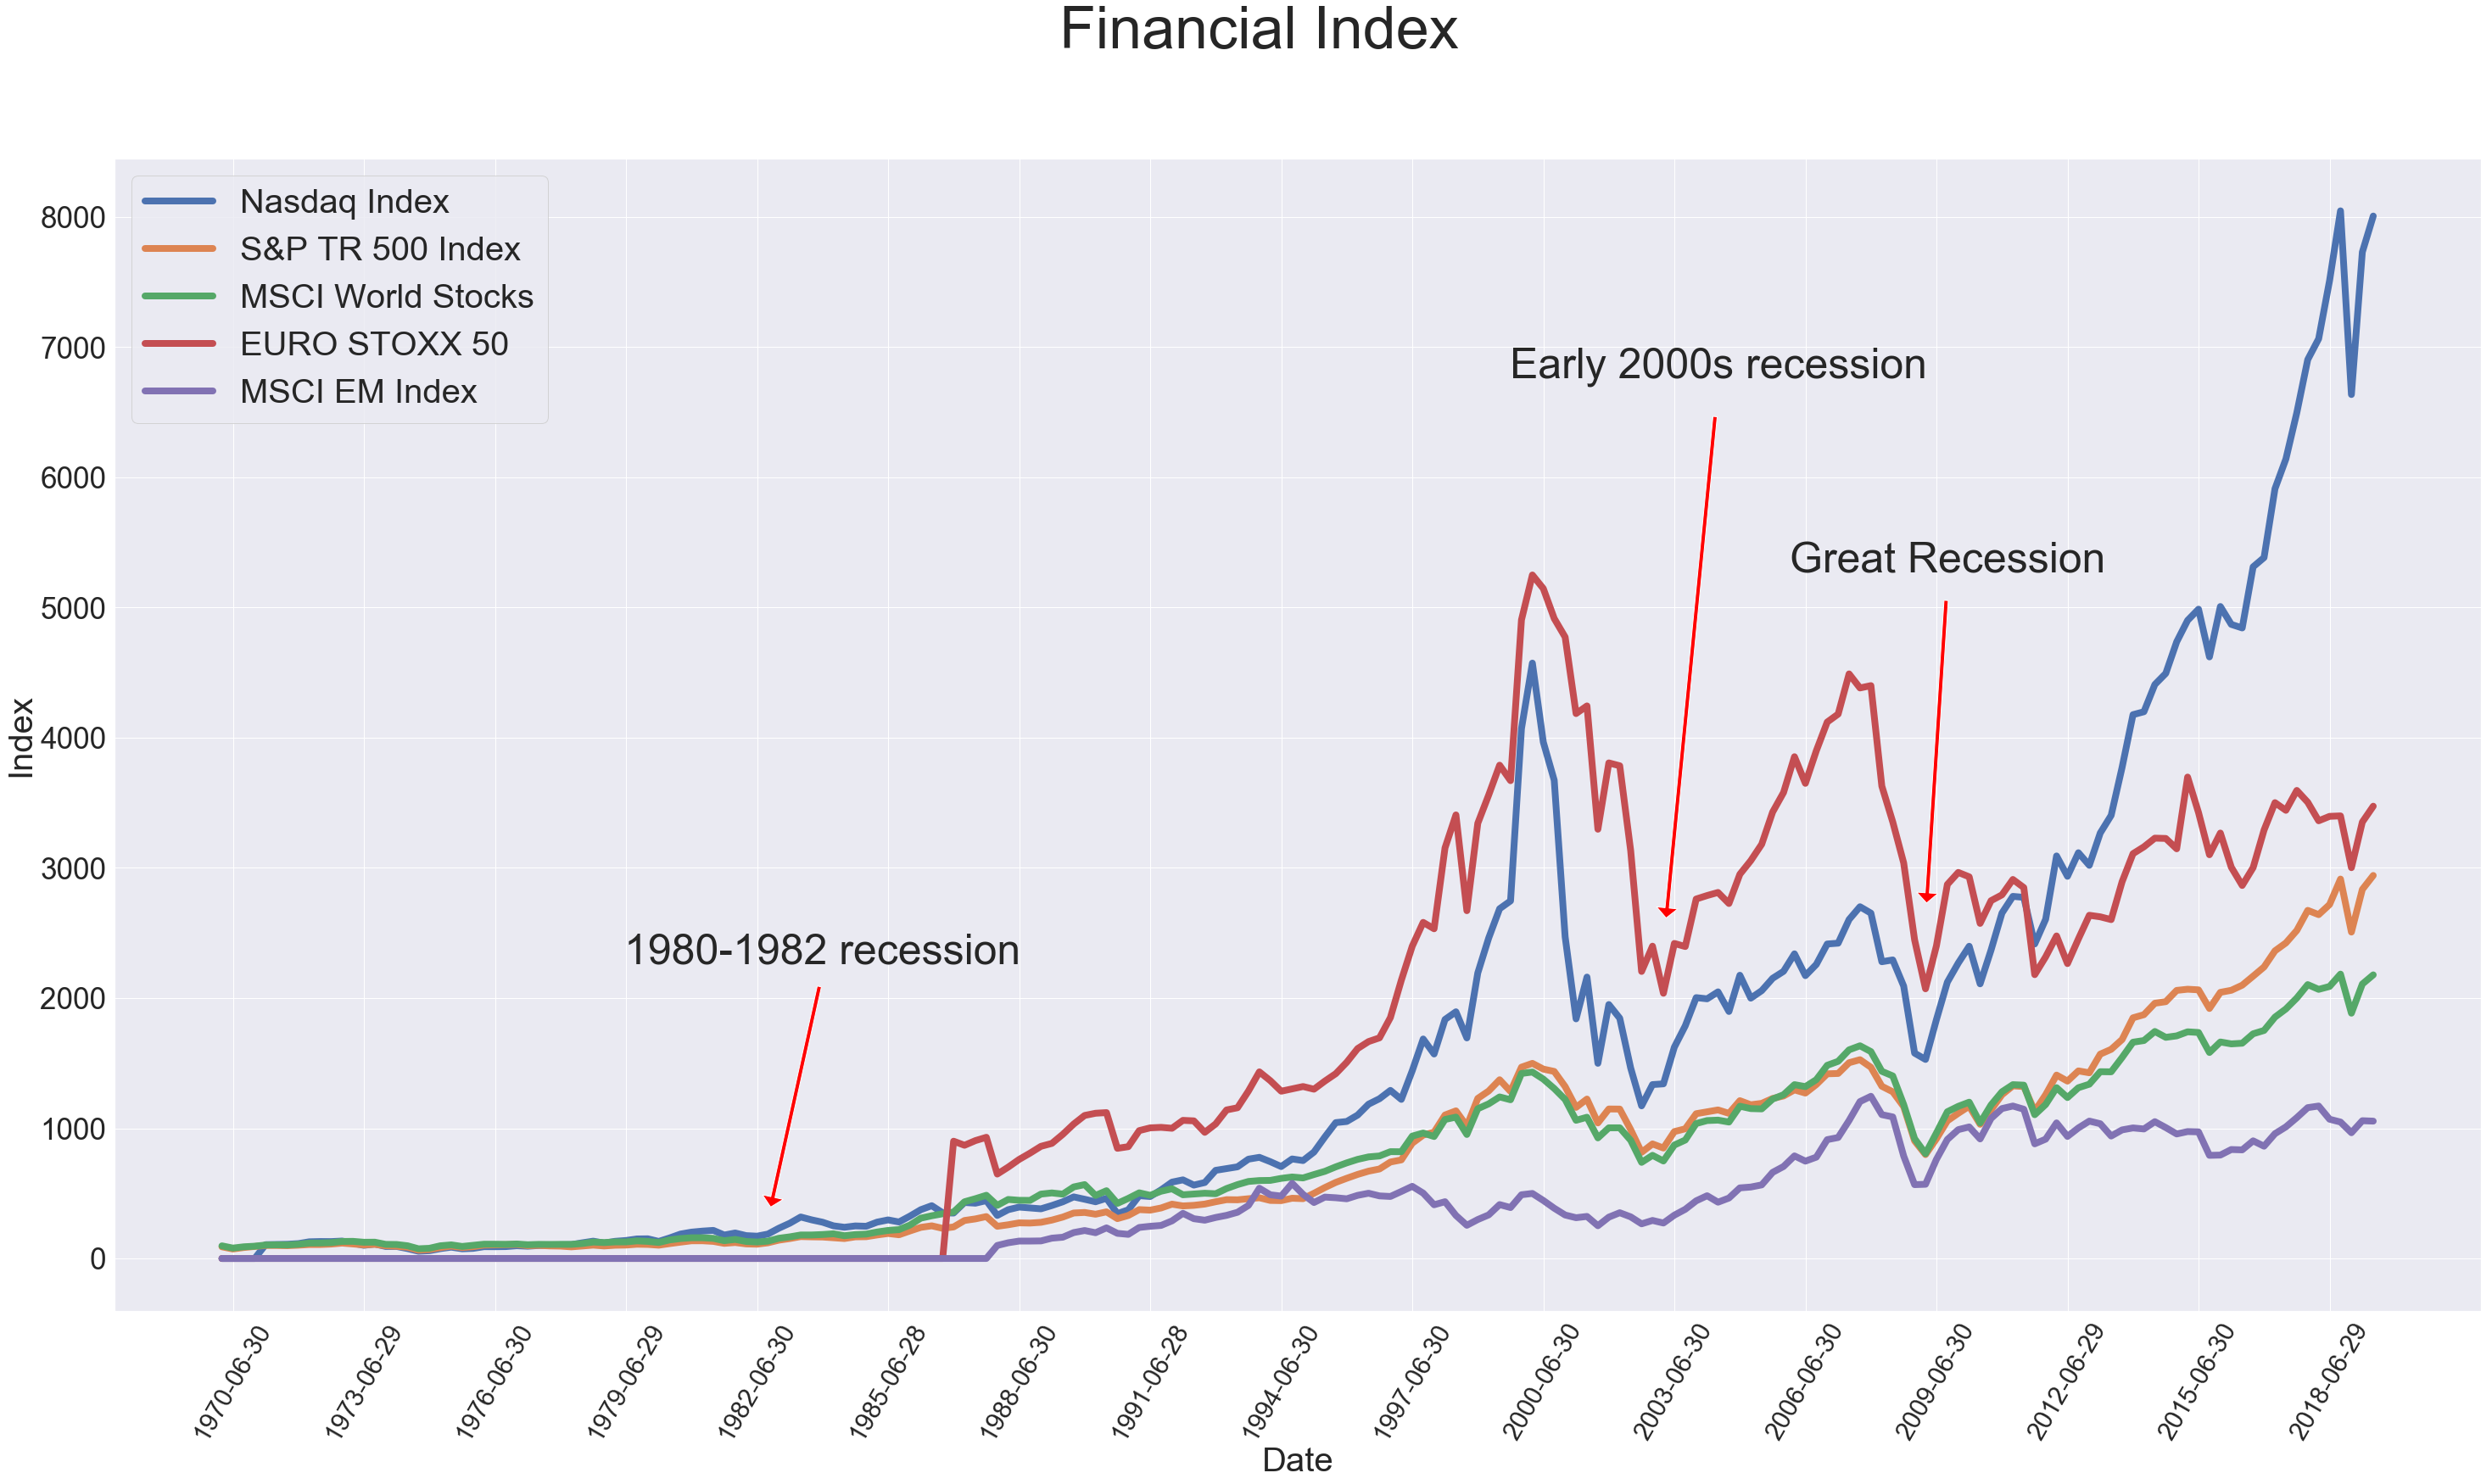

In [50]:
###############################################################
# Plot the trend line for the highly related variable to Nasdaq
###############################################################

# set the figure size
fig, ax = plt.subplots(figsize = (50,25))

# add the x-axis and the y-axis to the plot
ax.plot(econ_stock['Date'], econ_stock['Nasdaq_Index'], linewidth=8, label='Nasdaq Index')
ax.plot(econ_stock['Date'], econ_stock['S&P_Index'], linewidth=8, label='S&P TR 500 Index')
ax.plot(econ_stock['Date'], econ_stock['MSCI_World'], linewidth=8, label='MSCI World Stocks')
ax.plot(econ_stock['Date'], econ_stock['EURO_STOXX'], linewidth=8, label='EURO STOXX 50')
#ax.plot(econ_stock['Date'], econ_stock['MSCI_APAC'], linewidth=8, label='MSCI APAC Stocks')
ax.plot(econ_stock['Date'], econ_stock['MSCI_EM'], linewidth=8, label='MSCI EM Index')

# add xlabels, ylabels, legend and tilte
plt.setp(ax.get_xticklabels(), rotation= 60)
plt.xlabel('Date', fontsize = 40)
plt.ylabel('Index', fontsize = 40)
plt.xticks(range(1,len(econ_stock), 12), fontsize = 30)
plt.yticks(fontsize = 35)
plt.legend(fontsize= 40)
fig.suptitle('Financial Index', fontsize=70)

# add text and arrow
ax.annotate('Great Recession', fontsize = 50, xy=(156, 2600), xytext=(158, 5500),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top')

ax.annotate('Early 2000s recession', fontsize = 50, xy=(132, 2400), xytext=(137, 7000),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top')

ax.annotate('1980-1982 recession', fontsize = 50, xy=(50, 300), xytext=(55, 2500),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top');

# output the firgure as png file
fig.savefig("Financial Index.png")

### Part 3: Machine Learning Modeling

In [109]:
# Importing the dataset
stock = pd.read_csv("stock.csv") 
stock = stock.iloc[:, 1:]
stock = stock.sort_values(by='Date', ascending = True)
stock.head()

X = stock.iloc[330:,1:5].values
y = stock.iloc[330:, 6].values

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Feature Scaling
#from sklearn.preprocessing import StandardScaler

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

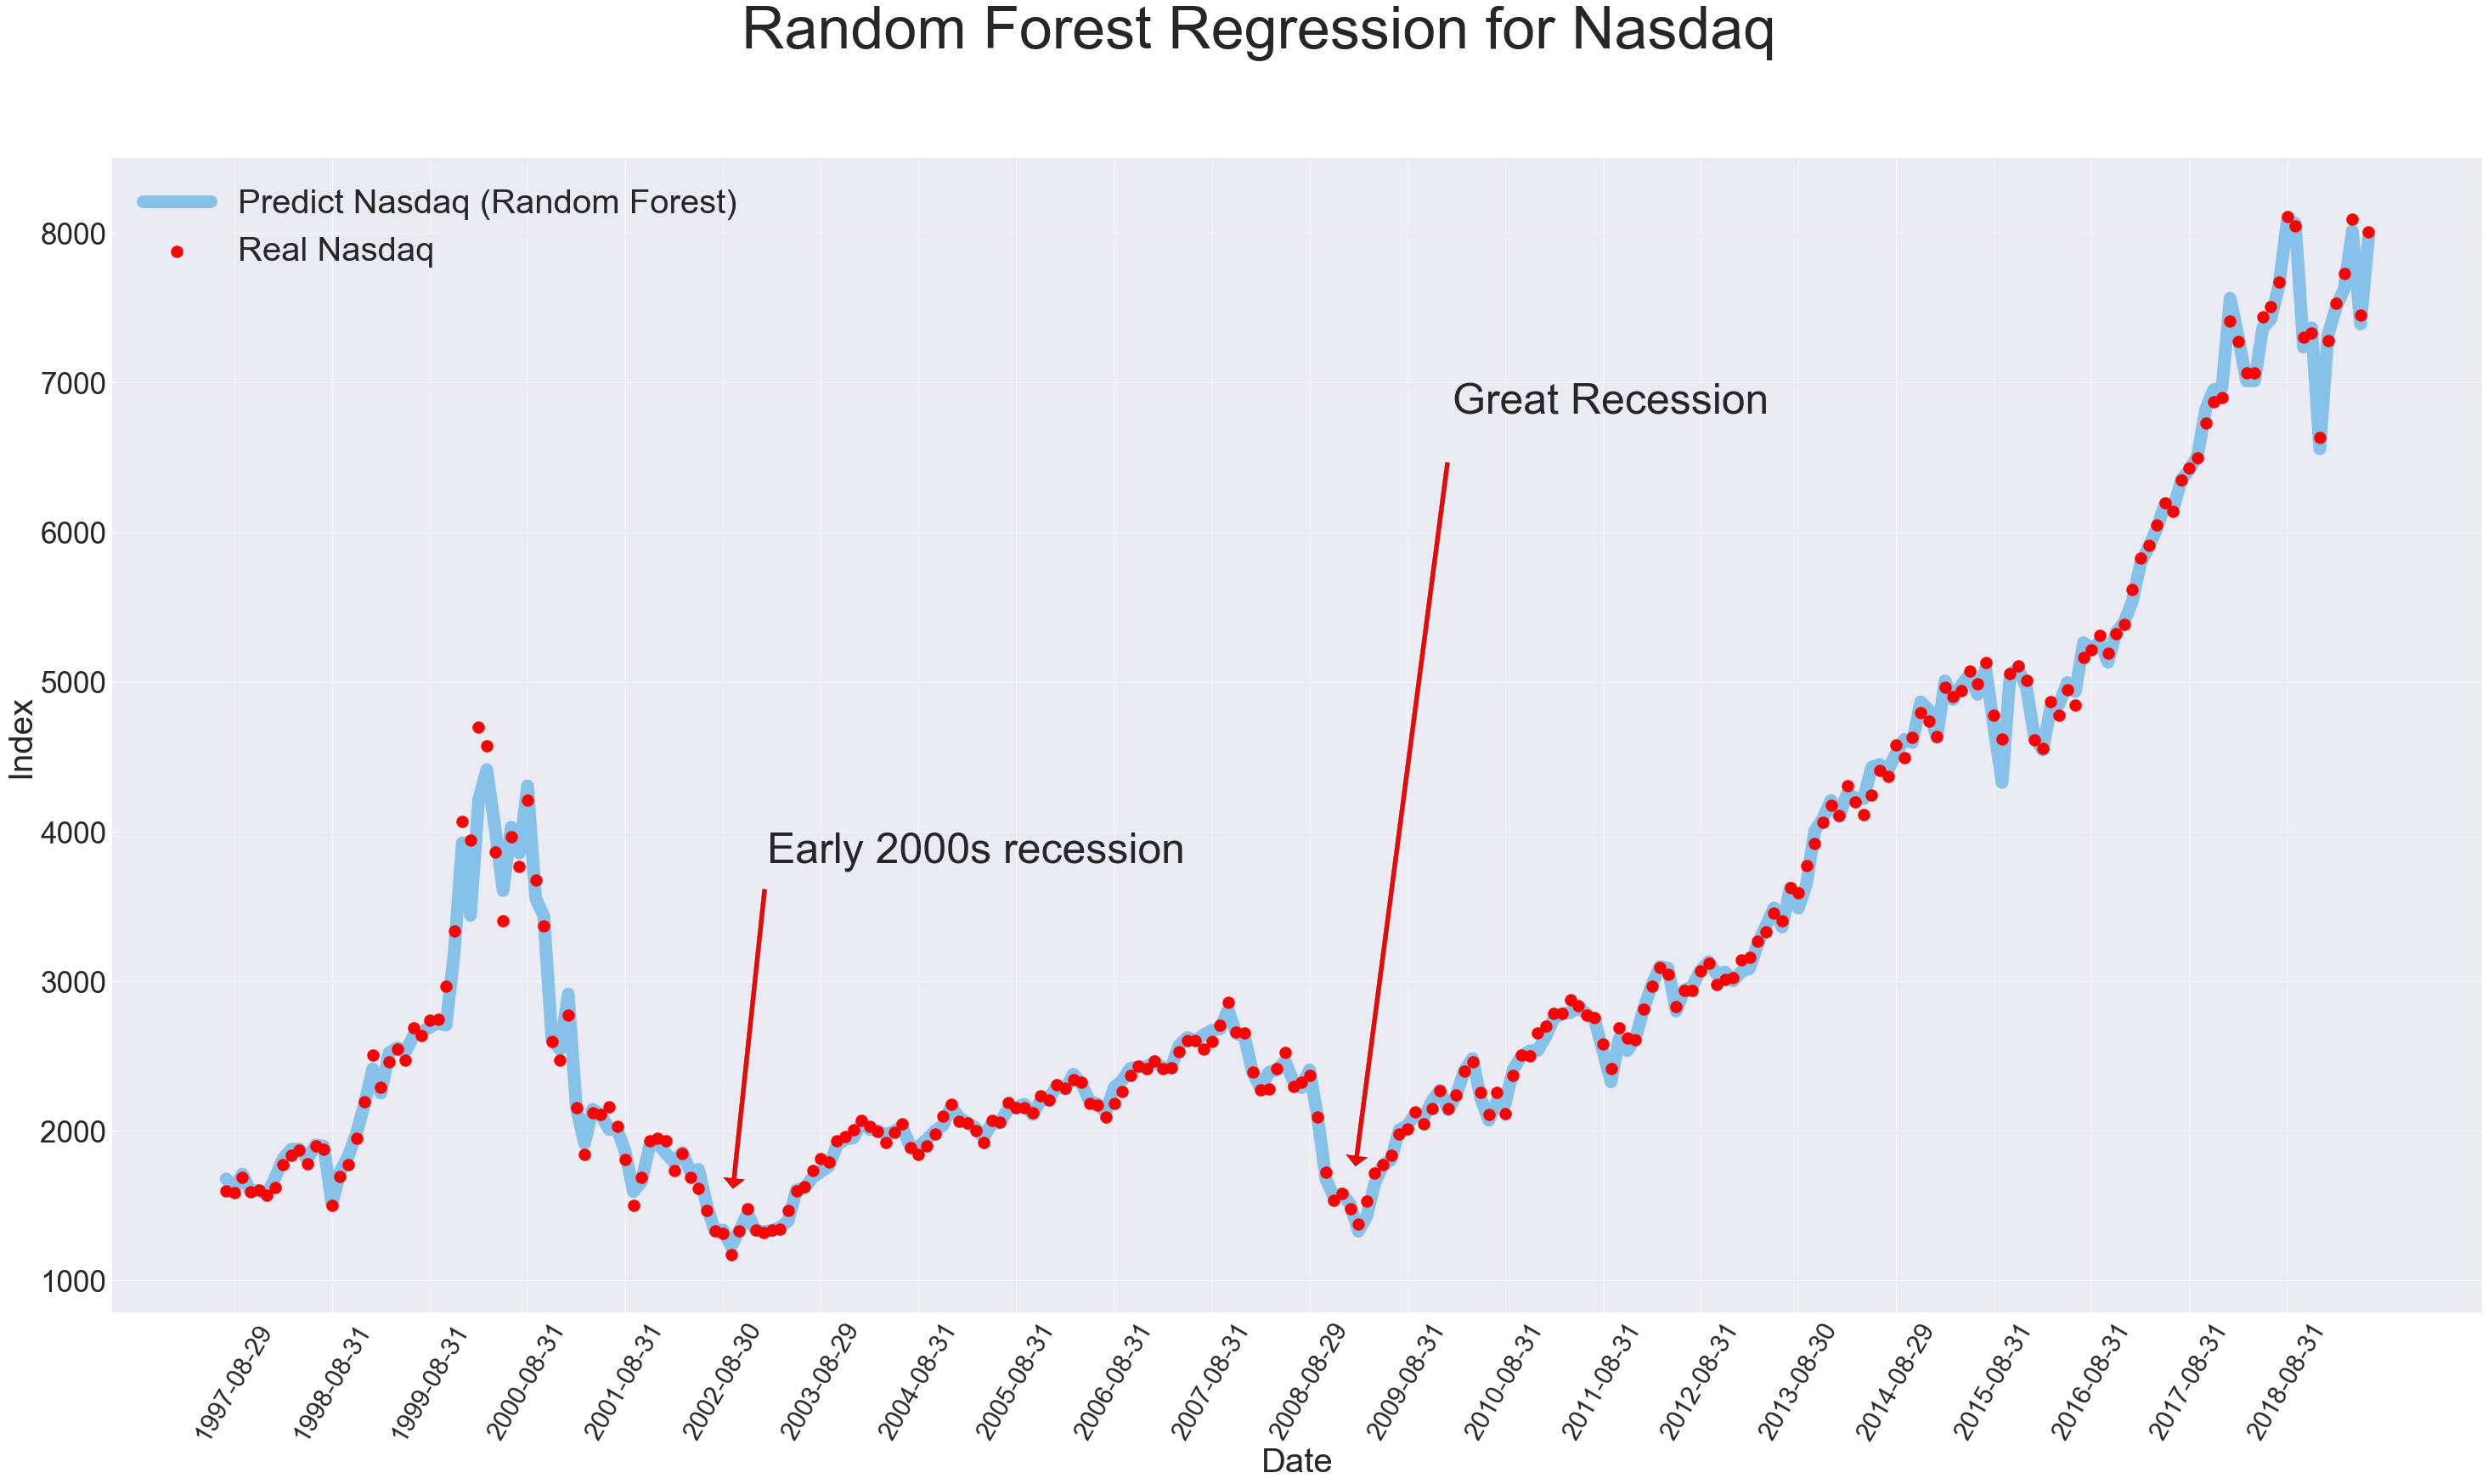

In [133]:
# plot the regression result and the real index of Nasdaq
fig, ax = plt.subplots(figsize = (50,25))

ax.plot(regressor.predict(X), color = '#85C1E9', linewidth = 15, zorder = 1, label = 'Predict Nasdaq (Random Forest)')
plt.scatter(stock['Date'][330:], y, color = 'red', s=200, zorder = 2, label = 'Real Nasdaq')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation= 60)
plt.xlabel('Date', fontsize = 40)
plt.ylabel('Index', fontsize = 40)
plt.xticks(range(1,len(stock['Date'][330:]), 12), fontsize = 30)
plt.yticks(fontsize = 35)
plt.legend(fontsize= 40)

# add text and arrow
ax.annotate('Great Recession', fontsize = 50, xy=(138, 1500), xytext=(170, 7000),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top')

ax.annotate('Early 2000s recession', fontsize = 50, xy=(62, 1500), xytext=(92, 4000),
            arrowprops=dict(facecolor='red', shrink=0.05, headwidth = 25, width = 5),
            horizontalalignment='center',
            verticalalignment='top')

# set title and labels for axes
fig.suptitle('Random Forest Regression for Nasdaq', fontsize=70)

# output the graph
fig.savefig("Random Forest Regression for Nasdaq.png")

### Wenqi Liu

In [48]:
# Merge Econ data with commodity data, output is quarterly data.

econ_com_data = econ_data.merge(commodity_data, how = 'inner', on = ['Date'])
econ_com_data.head()

Fed_Rate  GDP_Nominal  GDP_Real  Inflation  Unemployment  \
Date                                                                   
2019-06-01      2.38          4.0       2.3        1.6          3.63   
2019-03-01      2.41          4.6       2.7        1.9          3.87   
2018-12-01      2.27          4.9       2.5        1.9          3.80   
2018-09-01      1.95          5.8       3.1        2.3          3.80   
2018-06-01      1.82          6.0       3.2        2.9          3.90   

            Consumer_Credit_USD  Consumer_Credit_YOY  FED_Recession_Index  \
Date                                                                        
2019-06-01               17.086                  5.2                12.51   
2019-03-01               10.982                  4.9                10.84   
2018-12-01               11.997                  4.7                11.46   
2018-09-01               14.311                  4.9                10.33   
2018-06-01                8.875                  4.2                 9.87   

            CB_Leading_Indic  Recession     Gold   Silver      Oil    NatGas  \
Date                                                                           
2019-06-01               1.6          0  1409.55  15.3150  488.916  15.83163   
2019-03-01               2.9          0  1292.38  15.1183  503.268  18.64069   
2018-12-01               4.1          0  1282.49  15.4950  385.128  19.56432   
2018-09-01               6.6          0  1190.88  14.6554  620.550  19.63935   
2018-06-01               5.8          0  1252.60  16.1185  604.841  18.76360   

            Agriculture   Soybean     Corn    Wheat  WTI_Oil  
Date                                                          
2019-06-01     354.7374  3579.369  74.3491  74.2323    54.66  
2019-03-01     333.5600  3567.618  64.6971  65.1003    58.15  
2018-12-01     349.1218  3645.559  69.0841  71.5275    49.52  
2018-09-01     347.2622  3527.143  67.2397  73.3576    70.23  
2018-06-01     367.1628  3652.229  70.0565  74.6525    67.87

In [49]:
# Merge stock data with commodity data, outcome is monthly data.

stock_com_data = stock_data.merge(commodity_data, how = 'inner', on = ['Date'])
stock_com_data.head()

S&P_Index  MSCI_World  EURO_STOXX  MSCI_APAC  MSCI_EM  \
Date                                                                
2019-06-01    2941.76     2178.35     3473.69     160.05  1054.86   
2019-05-01    2752.06     2046.25     3280.43     152.36   998.00   
2019-04-01    2945.83     2178.67     3514.62     162.36  1079.24   
2019-03-01    2834.40     2107.74     3351.71     159.81  1058.13   
2019-02-01    2784.49     2085.84     3298.26     158.69  1050.95   

            Nasdaq_Index   Bitcoin  Citi_econ_surprise  USD_Index     Gold  \
Date                                                                         
2019-06-01      8006.244  12212.70               -68.3     96.130  1409.55   
2019-05-01      7453.148   8503.38               -32.3     97.750  1305.58   
2019-04-01      8095.388   5237.87               -58.7     97.479  1283.53   
2019-03-01      7729.321   4072.16               -35.9     97.284  1292.38   
2019-02-01      7532.532   3802.53               -29.8     96.157  1313.32   

             Silver      Oil    NatGas  Agriculture   Soybean     Corn  \
Date                                                                     
2019-06-01  15.3150  488.916  15.83163     354.7374  3579.369  74.3491   
2019-05-01  14.5942  448.499  16.76547     353.5957  3504.901  75.9928   
2019-04-01  14.9525  535.766  17.79443     322.1981  3403.133  64.3832   
2019-03-01  15.1183  503.268  18.64069     333.5600  3567.618  64.6971   
2019-02-01  15.6120  480.793  19.72403     338.9276  3665.369  67.1522   

              Wheat  WTI_Oil  
Date                          
2019-06-01  74.2323    54.66  
2019-05-01  71.2631    60.83  
2019-04-01  60.6207    63.86  
2019-03-01  65.1003    58.15  
2019-02-01  65.2221    54.95

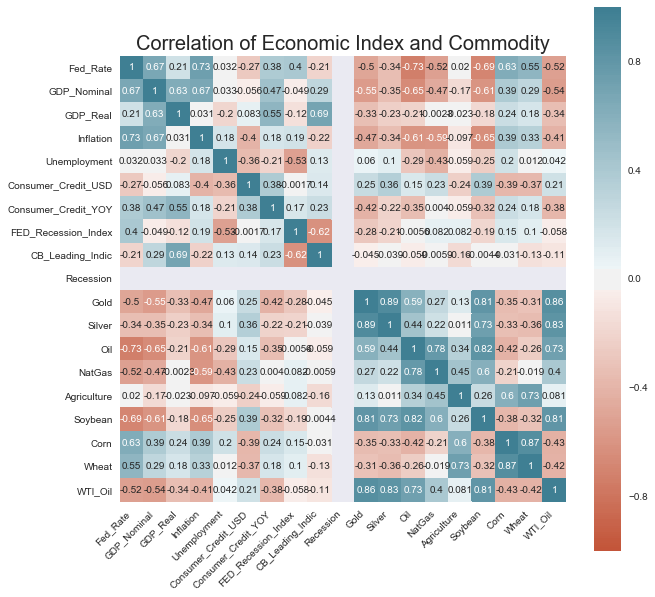

In [50]:
# correlation between econ index and commodity

corr = econ_com_data.corr(method ='spearman')

plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Correlation of Economic Index and Commodity', fontsize = 20);

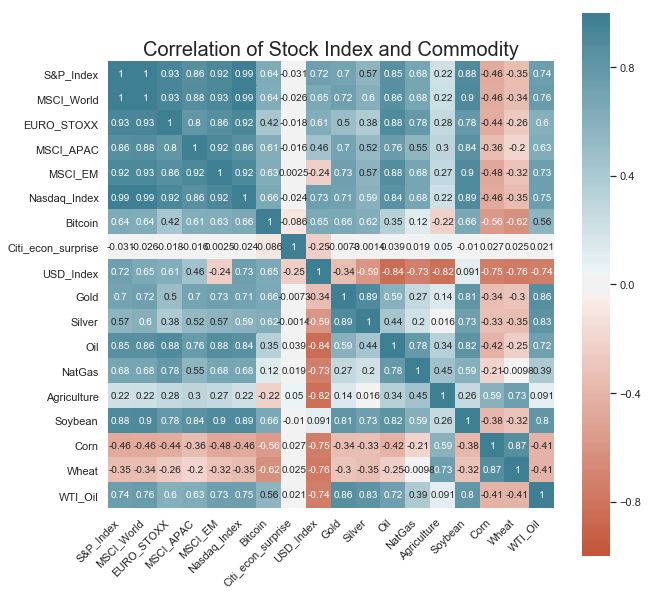

In [55]:
# correlation of stock index and commodity

corr = stock_com_data.corr(method ='spearman')

plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Correlation of Stock Index and Commodity', fontsize = 20);

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

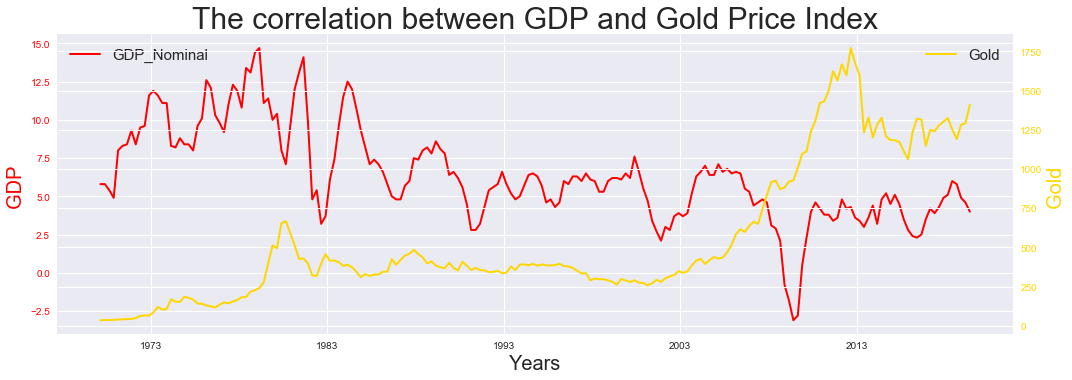

In [51]:
# GDP and gold

fig, ax1 = plt.subplots(figsize = (15,5))

color = 'red'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('GDP ', color=color, fontsize = 20)
ax1.plot( 'GDP_Nominal', data=econ_com_data, color=color, linewidth = 2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'gold'
ax2.set_ylabel('Gold ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot( 'Gold', data=econ_com_data, color=color, linewidth = 2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend(loc='upper left', fontsize = 15 )
ax2.legend(loc='upper right', fontsize = 15)
ax1.set_title("The correlation between GDP and Gold Price Index", fontsize = 30)
plt.show()


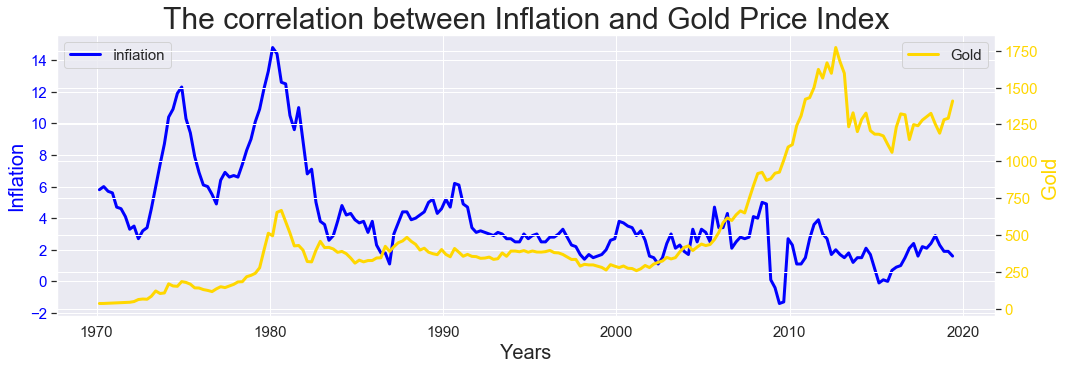

In [58]:
# Inflation and gold
fig, ax1 = plt.subplots(figsize = (15,5))

color = 'blue'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('Inflation', color=color, fontsize = 20)
ax1.plot( 'Inflation', data=econ_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 15)
ax1.tick_params(axis="x", labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'gold'
ax2.set_ylabel('Gold ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot( 'Gold', data=econ_com_data, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend(loc='upper left', fontsize = 15 )
ax2.legend(loc='upper right', fontsize = 15)
ax1.set_title("The correlation between Inflation and Gold Price Index", fontsize = 30)
plt.show()

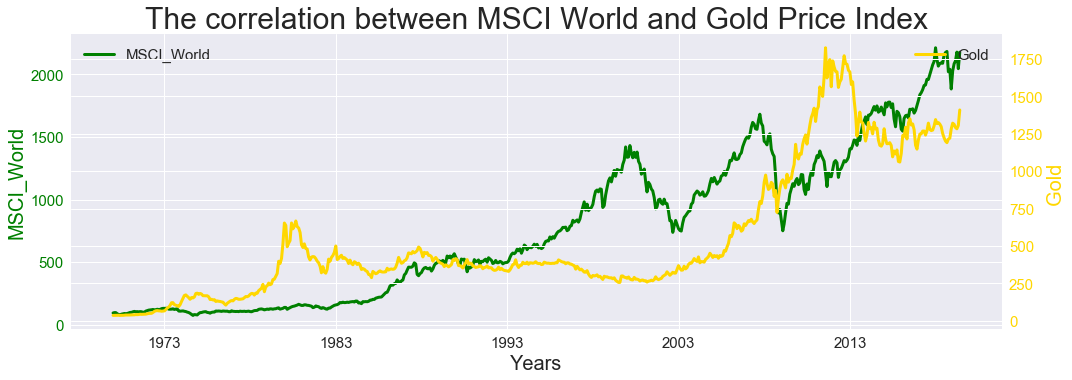

In [52]:
# MSCI and gold
fig, ax1 = plt.subplots(figsize = (15,5))

color = 'green'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('MSCI_World', color=color, fontsize = 20)
ax1.plot( 'MSCI_World', data=stock_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 15)
ax1.tick_params(axis="x", labelsize=15)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'gold'
ax2.set_ylabel('Gold ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot( 'Gold', data=stock_com_data, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend(loc='upper left', fontsize = 15 )
ax2.legend(loc='upper right', fontsize = 15)
ax1.set_title("The correlation between MSCI World and Gold Price Index", fontsize = 30)
plt.show()

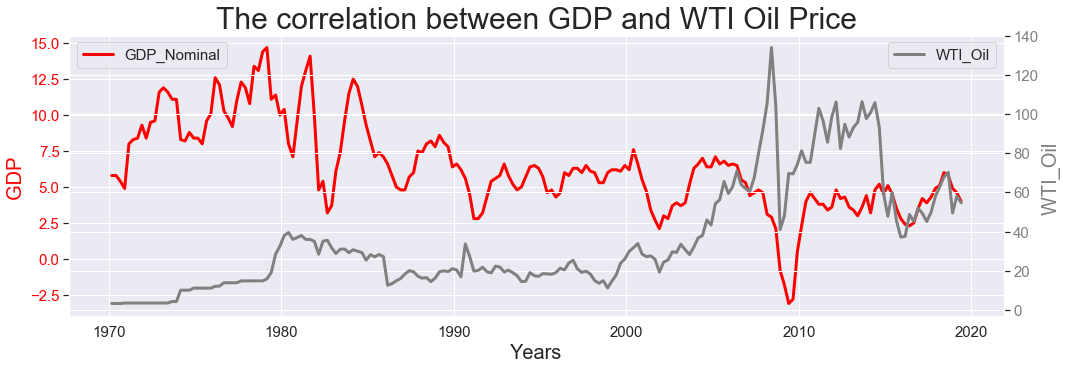

In [60]:
# GDP and Oil

fig, ax1 = plt.subplots(figsize = (15, 5))

color = 'red'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('GDP ', color=color, fontsize = 20)
ax1.plot( 'GDP_Nominal', data=econ_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'grey'
ax2.set_ylabel('WTI_Oil ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot( 'WTI_Oil', data=econ_com_data, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend(loc='upper left', fontsize = 15 )
ax2.legend(loc='upper right', fontsize = 15)
ax1.set_title("The correlation between GDP and WTI Oil Price", fontsize = 30)
plt.show()


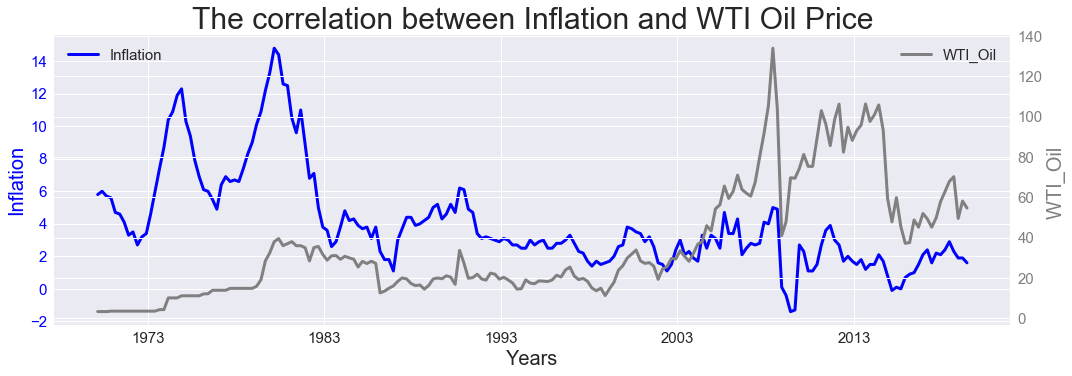

In [53]:
# Inflation and Oil

fig, ax1 = plt.subplots(figsize = (15,5))

color = 'blue'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('Inflation', color=color, fontsize = 20)
ax1.plot( 'Inflation', data=econ_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'grey'
ax2.set_ylabel('WTI_Oil ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot( 'WTI_Oil', data=econ_com_data, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend(loc='upper left', fontsize = 15 )
ax2.legend(loc='upper right', fontsize = 15)
ax1.set_title("The correlation between Inflation and WTI Oil Price", fontsize = 30)
plt.show()

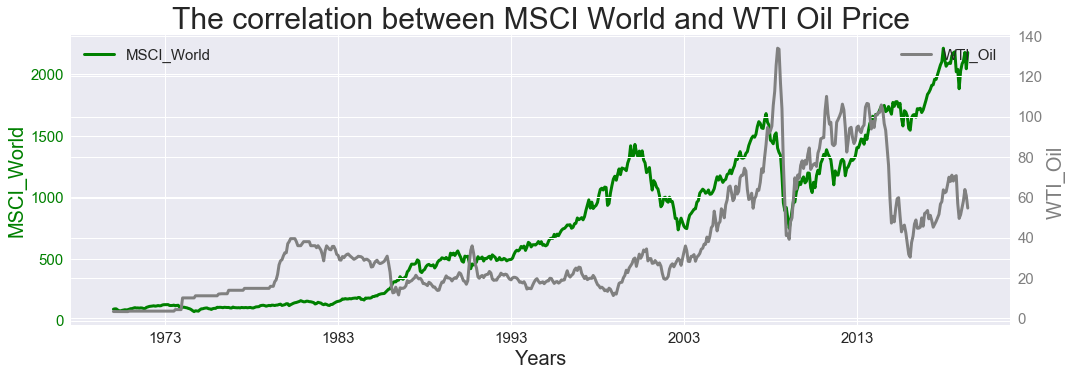

In [54]:
# MSCI and Oil

fig, ax1 = plt.subplots(figsize = (15,5))

color = 'green'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('MSCI_World', color=color, fontsize = 20)
ax1.plot( 'MSCI_World', data=stock_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 15)
ax1.tick_params(axis='x', labelsize=15)

#ax1.annotate('Dot Com Bubble', fontsize = 40, xy=(100, 1600), xytext=(110, 1700),
           #arrowprops=dict(facecolor='black', shrink=0.05, headwidth = 25, width = 5),
           #horizontalalignment='right',
           #verticalalignment='top')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'grey'
ax2.set_ylabel('WTI_Oil ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot( 'WTI_Oil', data=stock_com_data, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend(loc='upper left', fontsize = 15 )
ax2.legend(loc='upper right', fontsize = 15)
ax1.set_title("The correlation between MSCI World and WTI Oil Price", fontsize = 30)
plt.show()


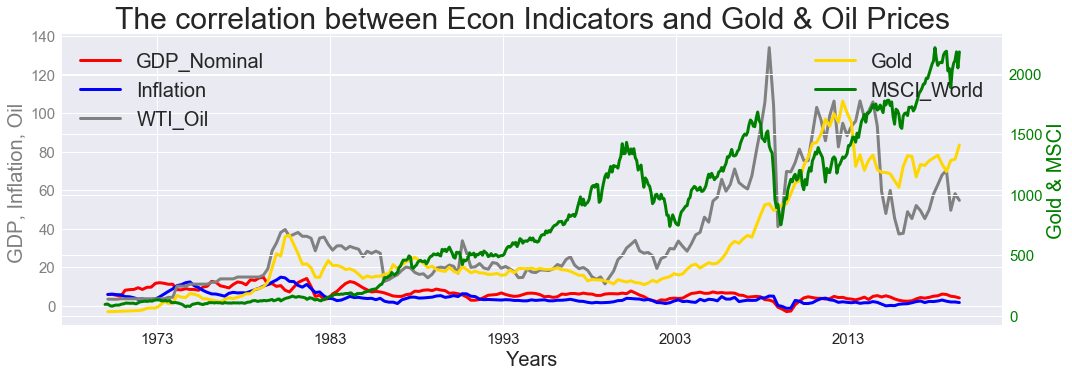

In [55]:
# Econ, Stock, Gold, Oil

fig, ax1 = plt.subplots(figsize = (15,5))

color = 'red'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('GDP, Inflation, Oil', color=color, fontsize = 20)
ax1.plot( 'GDP_Nominal', data=econ_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 15)
ax1.tick_params(axis='x', labelsize=15)

color = 'blue'
ax1.set_xlabel('Years', fontsize = 20)
ax1.set_ylabel('GDP, Inflation, Oil', color=color, fontsize = 20)
ax1.plot( 'Inflation', data=econ_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'gold'
ax2.set_ylabel('Gold & S&P ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot( 'Gold', data=econ_com_data, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 15)

color = 'grey'
ax1.set_ylabel('GDP, Inflation, Oil ', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax1.plot( 'WTI_Oil', data=econ_com_data, color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 15)

color = 'green'
ax2.set_xlabel('Years', fontsize = 20)
ax2.set_ylabel('Gold & MSCI', color=color, fontsize = 20)
ax2.plot( 'MSCI_World', data=stock_com_data, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped


ax1.legend(loc='upper left', fontsize = 20 )
ax2.legend(loc='upper right', fontsize = 20)
ax1.set_title("The correlation between Econ Indicators and Gold & Oil Prices", fontsize = 30)
plt.show()
